<h1><font color='green'>Library</font></h1>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<h1><font color='green'>Load Data...</font></h1>

In [2]:
data = pd.read_csv("05.Normalized Mental Health.csv").drop(['Unnamed: 0'], axis = 1)
data

self_empl_flag  comp_no_empl  tech_comp_flag  mh_coverage_flag  \
0                0.0     -0.531153             1.0               0.0   
1                0.0     -0.571808             1.0               0.0   
2                0.0     -0.571808             1.0               0.0   
3                1.0     -0.531153             1.0               1.0   
4                0.0     -0.571808             0.0               1.0   
...              ...           ...             ...               ...   
1428             1.0     -0.531153             1.0               1.0   
1429             1.0     -0.531153             1.0               1.0   
1430             0.0     -0.314326             1.0               1.0   
1431             0.0     -0.314326             0.0               2.0   
1432             0.0     -0.314326             1.0               1.0   

      mh_employer_discussion  mh_resources_provided  mh_anonimity_flag  \
0                        0.0                    0.0                2.0   
1                        1.0                    1.0                1.0   
2                        0.0                    0.0                2.0   
3                        0.0                    0.0                2.0   
4                        0.0                    0.0                0.0   
...                      ...                    ...                ...   
1428                     0.0                    0.0                2.0   
1429                     0.0                    0.0                2.0   
1430                     1.0                    1.0                2.0   
1431                     0.0                    1.0                2.0   
1432                     0.0                    0.0                2.0   

      mh_medical_leave  mh_discussion_neg_impact  ph_discussion_neg_impact  \
0                  0.0                       0.0                       0.0   
1                  1.0                       0.0                       0.0   
2                  2.0                       2.0                       0.0   
3                  2.0                       2.0                       0.0   
4                  2.0                       1.0                       2.0   
...                ...                       ...                       ...   
1428               2.0                       2.0                       0.0   
1429               2.0                       2.0                       0.0   
1430              -2.0                       2.0                       2.0   
1431              -2.0                       2.0                       0.0   
1432              -1.0                       2.0                       0.0   

      ...  live_in_Germany  live_in_Netherlands  live_in_United Kingdom  \
0     ...              0.0                  0.0                     1.0   
1     ...              0.0                  0.0                     0.0   
2     ...              0.0                  0.0                     1.0   
3     ...              0.0                  0.0                     1.0   
4     ...              0.0                  0.0                     0.0   
...   ...              ...                  ...                     ...   
1428  ...              0.0                  0.0                     0.0   
1429  ...              0.0                  0.0                     0.0   
1430  ...              0.0                  0.0                     0.0   
1431  ...              0.0                  0.0                     0.0   
1432  ...              0.0                  0.0                     0.0   

      live_in_United States of America  work_at_Australia  work_at_Canada  \
0                                  0.0                0.0             0.0   
1                                  1.0                0.0             0.0   
2                                  0.0                0.0             0.0   
3                                  0.0                0.0             0.0   
4                            

In [3]:
data1 = data.copy()

<h1><font color='green'>Clustering by KMeans</font></h1>

<h4>checking for the best cluster number</h4>

In [4]:
clusters = 15
inertias = []
for cluster in range(2, clusters+1):
    km = KMeans(n_clusters = cluster, random_state = 2)
    y = km.fit_predict(data1)
    inertias.append(km.inertia_)

<h3><font color='red'>checked by Elbow Method </font></h3>

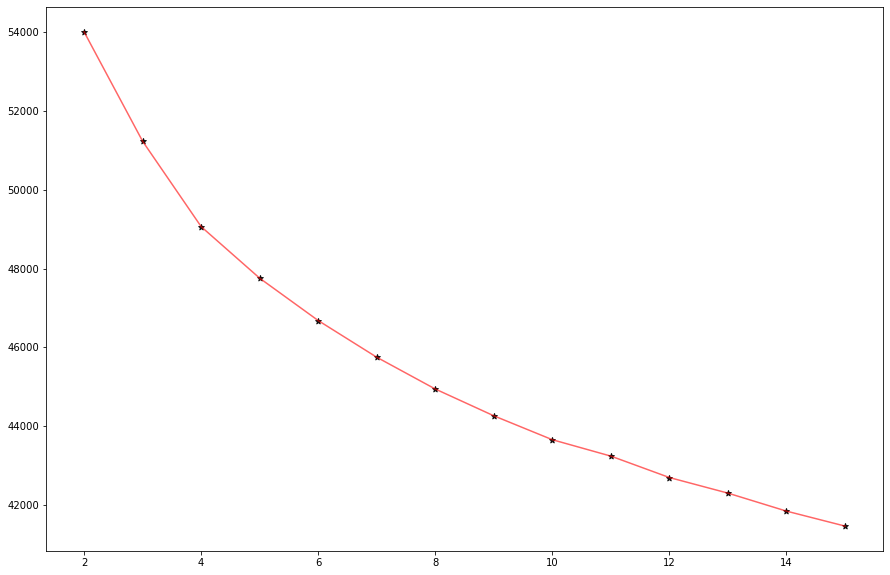

In [5]:
plt.figure(figsize = (15, 10))
plt.scatter(range(2, clusters+1), inertias, marker = '*', c = 'k',alpha = 0.9)
plt.plot(range(2, clusters+1), inertias, c = 'r', alpha = 0.6)

<h3><font color='red'>checked by Silhouette Method</font></h3>

<h4>silhouette_score and silhouette_samples</h4>

score : 0.080795570418791
score : 0.07510050478198149
score : 0.0688363121509275
score : 0.05922257884015506
score : 0.05606317049603407
score : 0.05437098788280299
score : 0.05236778637770701
score : 0.05438377438536729
score : 0.055012596213444946
score : 0.055507652171604076
score : 0.05205446657080438
score : 0.0522468020708577
score : 0.05182717382062453
score : 0.04921862709045425


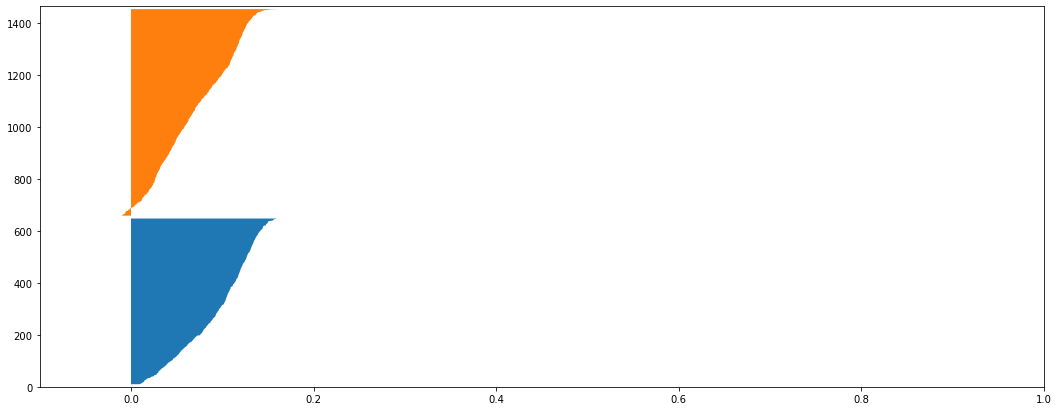

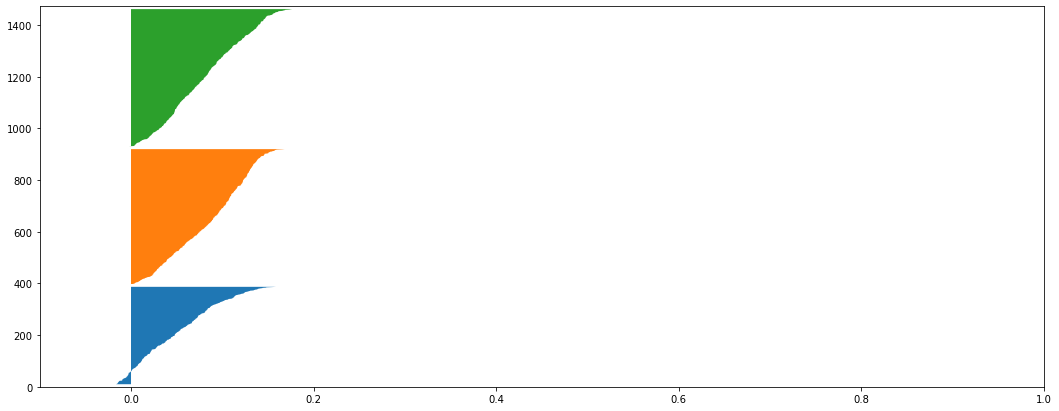

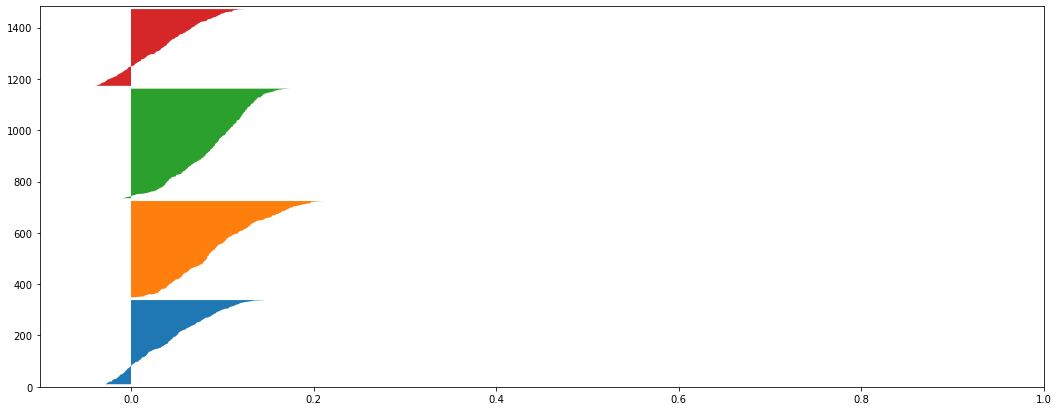

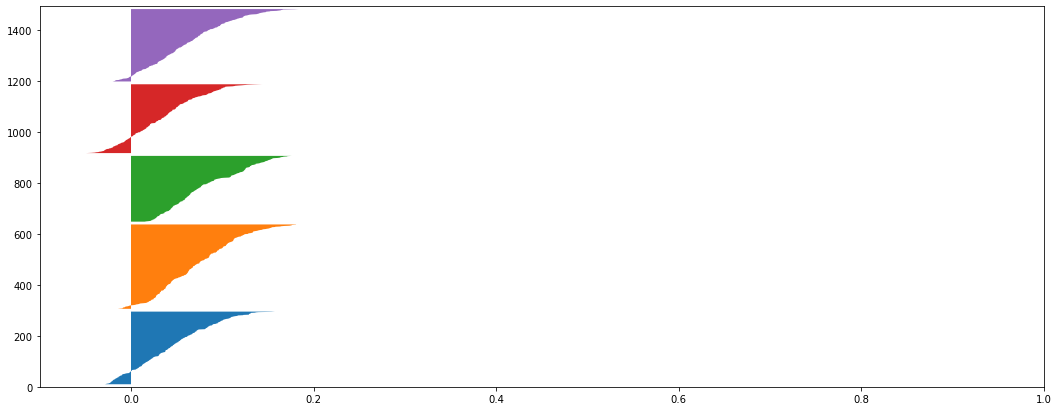

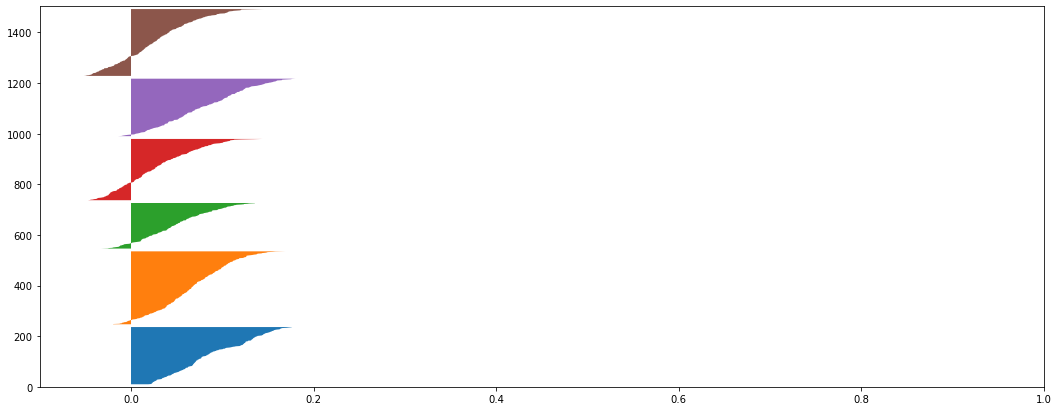

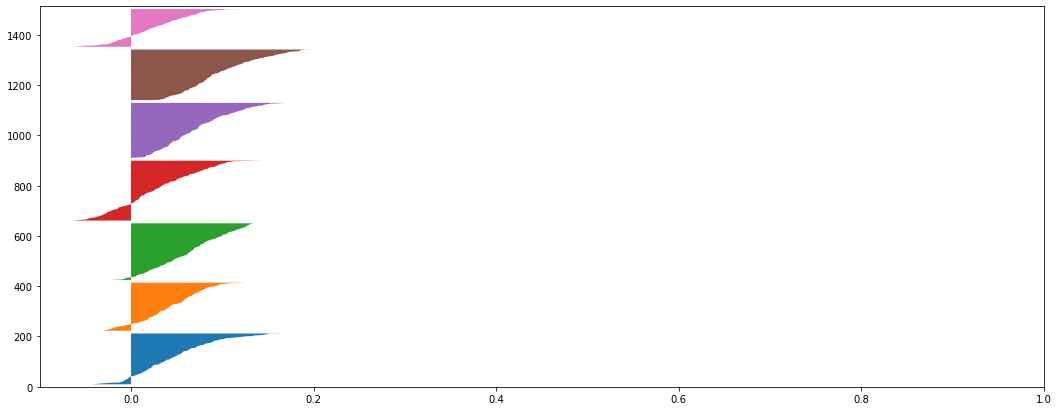

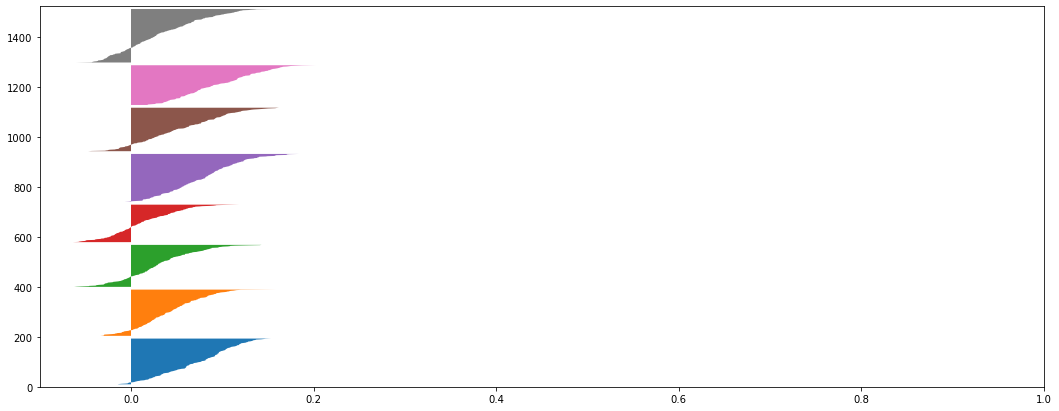

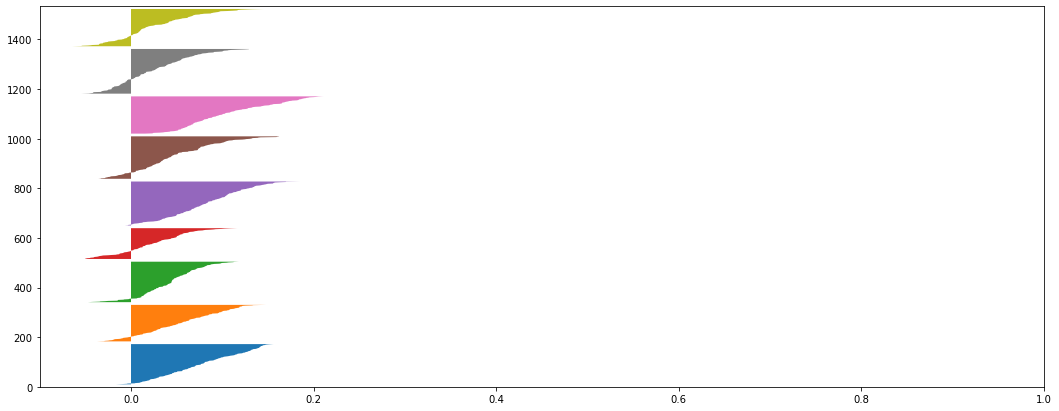

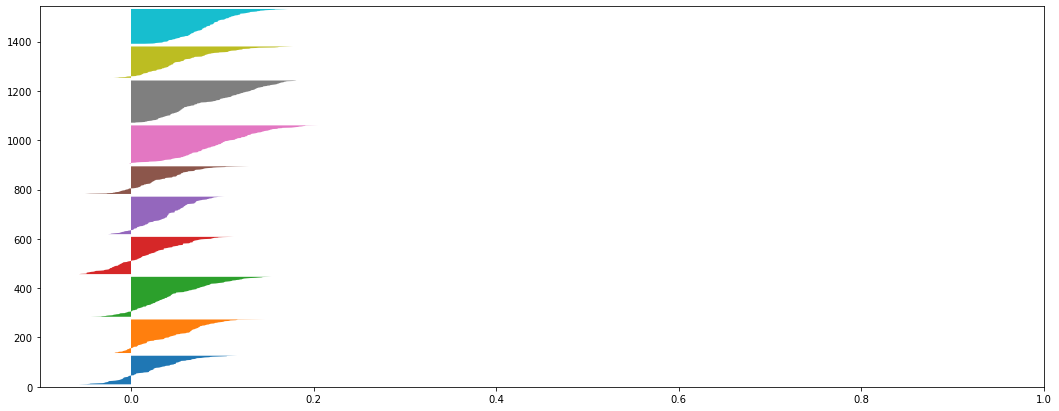

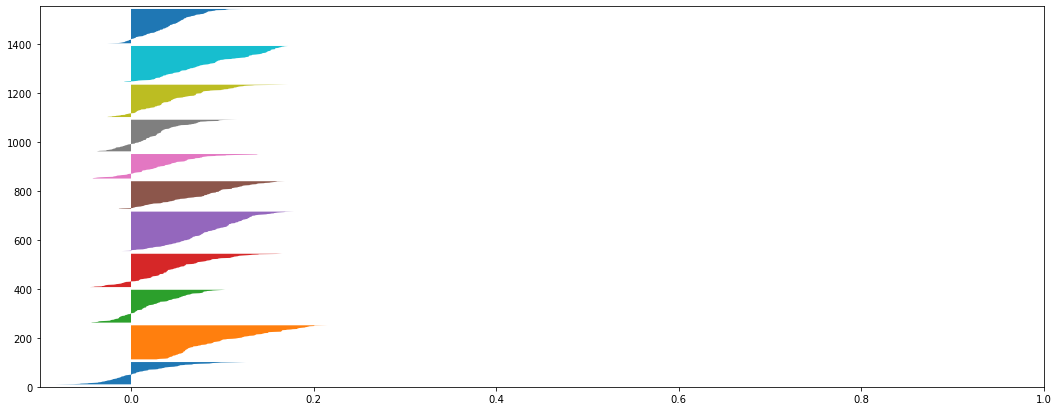

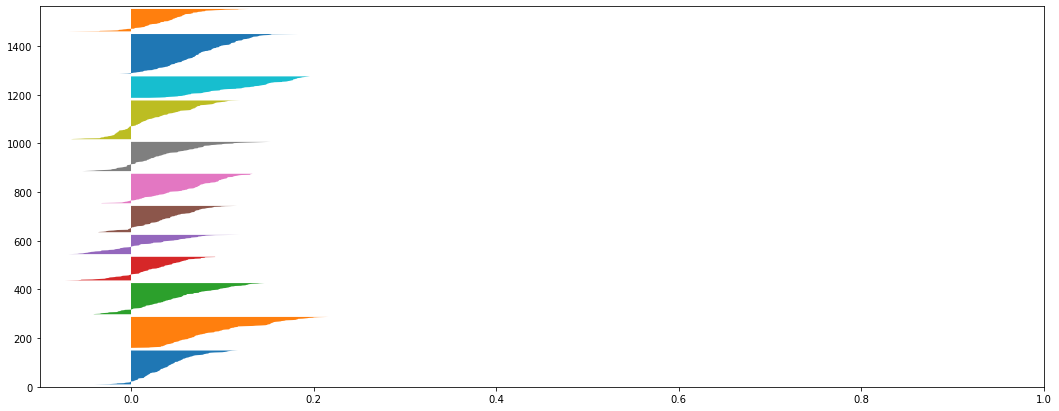

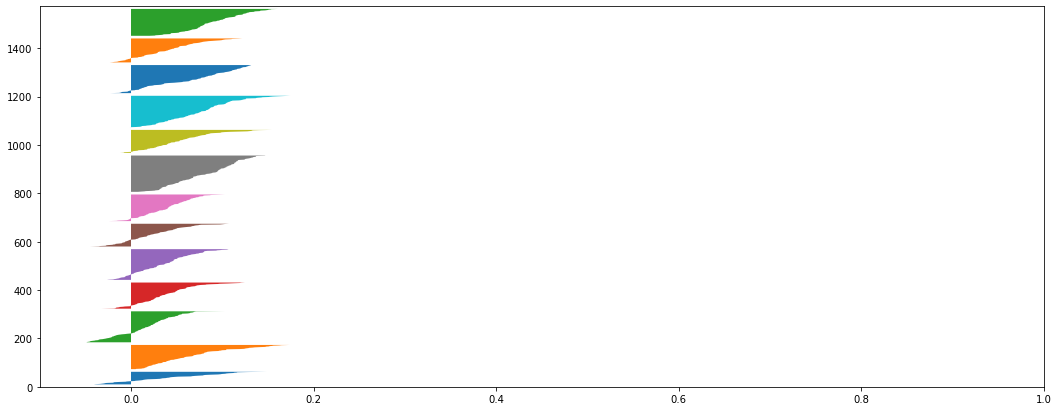

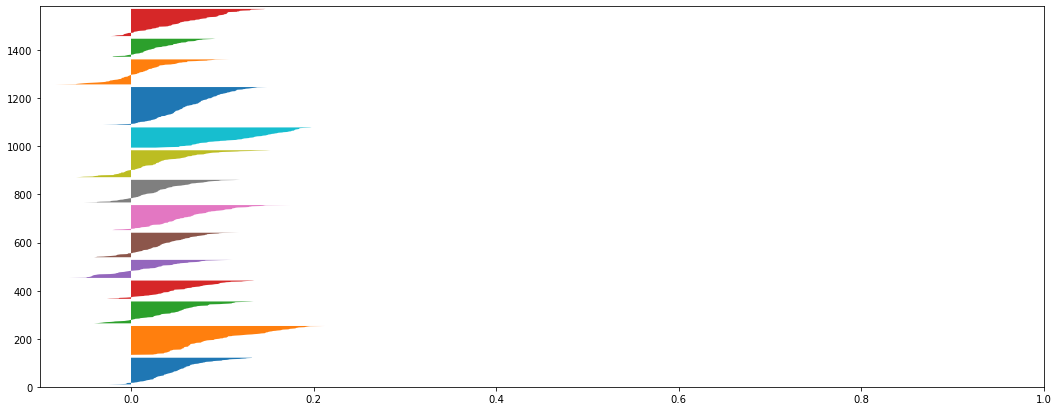

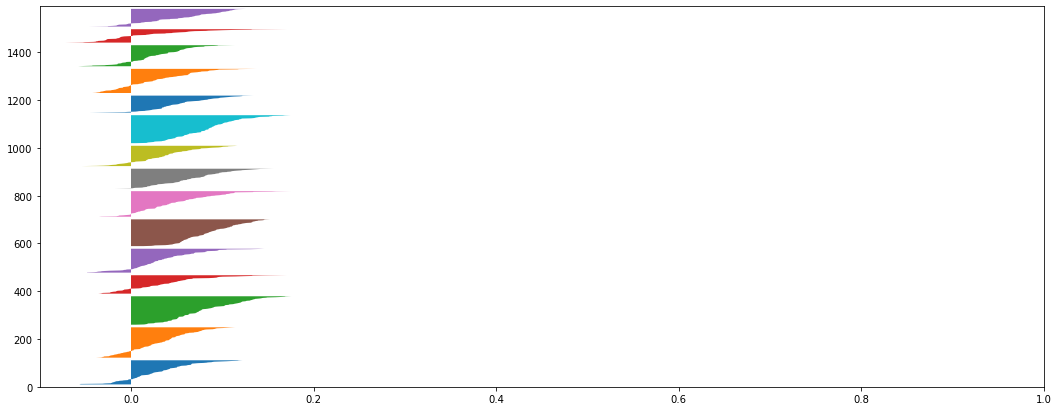

In [6]:
clusters = 15
for cluster in range(2, clusters+1):
    km = KMeans(n_clusters = cluster, random_state = 1)
    y = km.fit_predict(data1)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1) + (cluster + 1) * 10])
    
    score = silhouette_score(data1, y)
    print('score :',score)

    sil_sample = silhouette_samples(data1, y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10

<h1><font color='green'>Clustering by KModes</font></h1>

<h4>checking for the best cluster number</h4>

In [7]:
clusters = 15
inertias = []
for cluster in range(2, clusters+1):
    km2 = KModes(n_clusters = cluster, init='Cao', random_state = 5)
    y = km2.fit_predict(data1)
    inertias.append(km2.cost_)

<h3><font color='red'>checked by Elbow Method</font></h3>

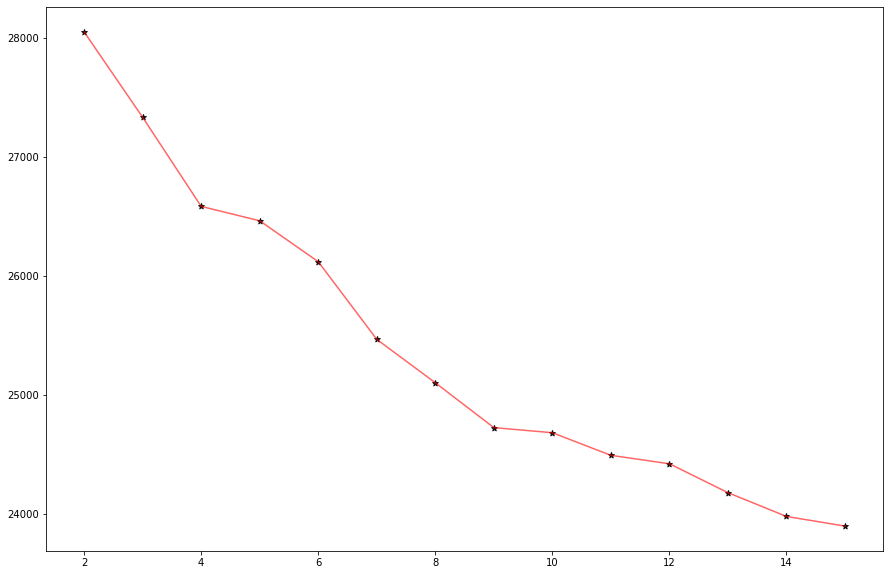

In [8]:
plt.figure(figsize = (15, 10))
plt.scatter(range(2, clusters+1), inertias, marker = '*', c = 'k',alpha = 0.9)
plt.plot(range(2, clusters+1), inertias, c = 'r', alpha = 0.6)

<h3><font color='red'>checked by Silhouette Method</font></h3>

score : 0.060808076062704566
score : 0.036342264442298114
score : 0.02841455286629888
score : 0.0239909434228744
score : 0.02219798486908399
score : 0.01492844989500807
score : 0.010899609071758656
score : 0.008244762377949006
score : 0.00783168130889683
score : 0.008423317526069849
score : 0.00570915155109475
score : 0.0030421751646015514
score : 0.002235690559959799
score : -0.0017855361503157613


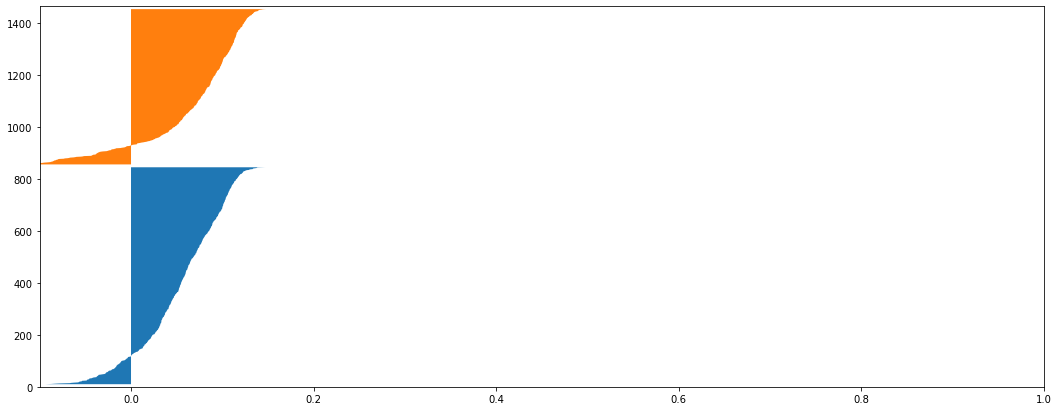

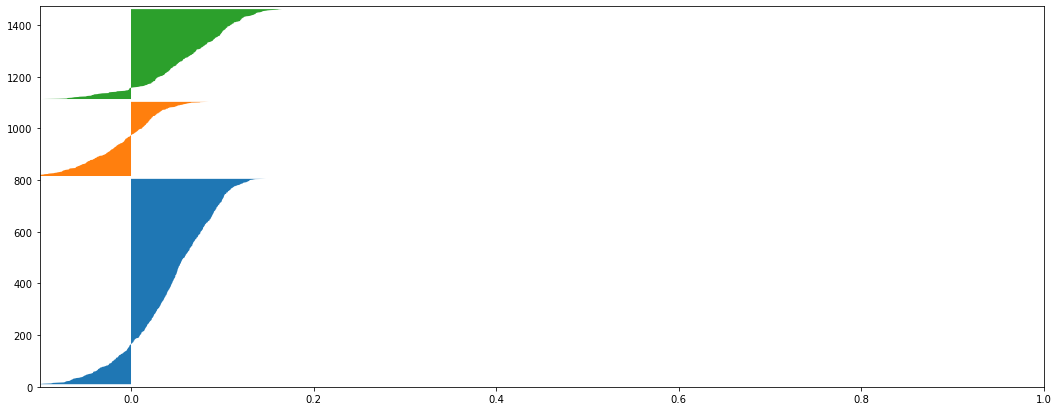

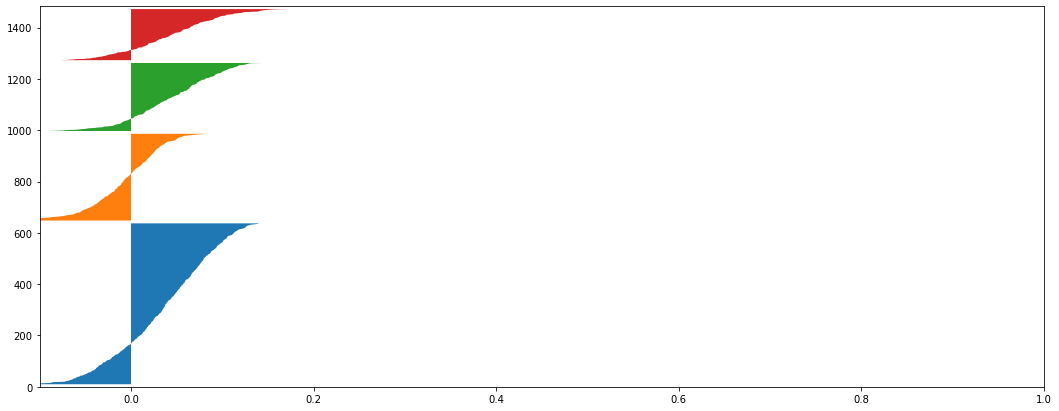

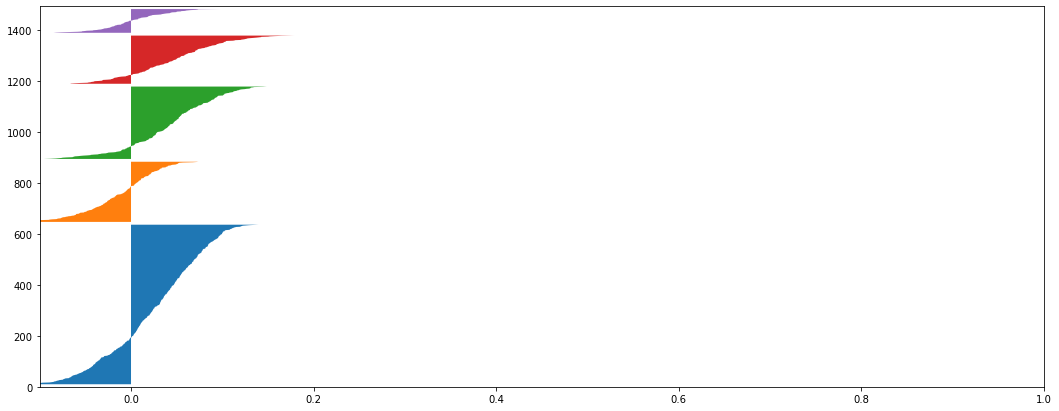

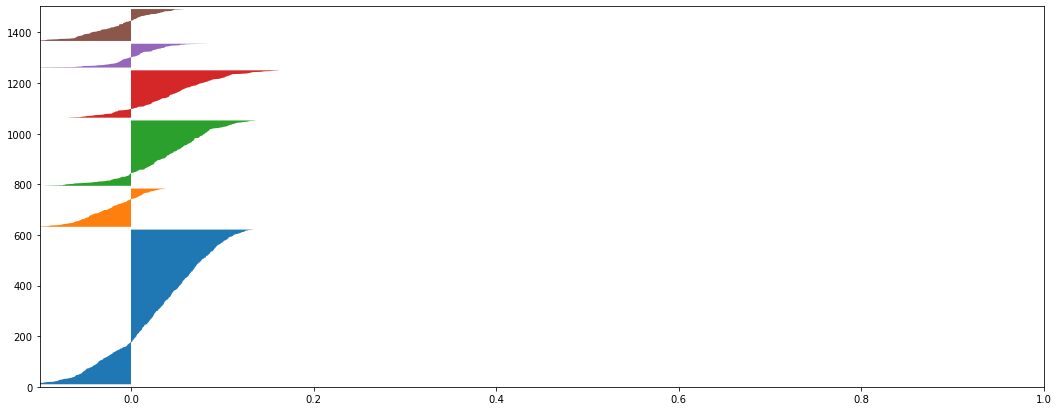

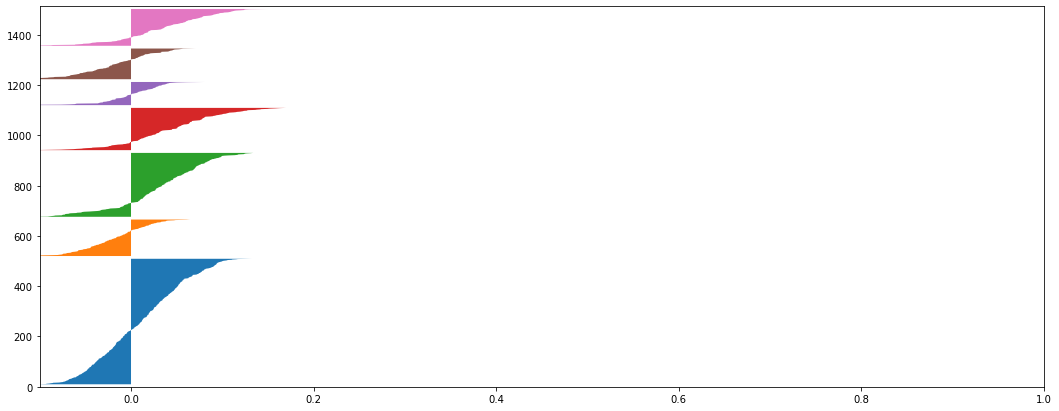

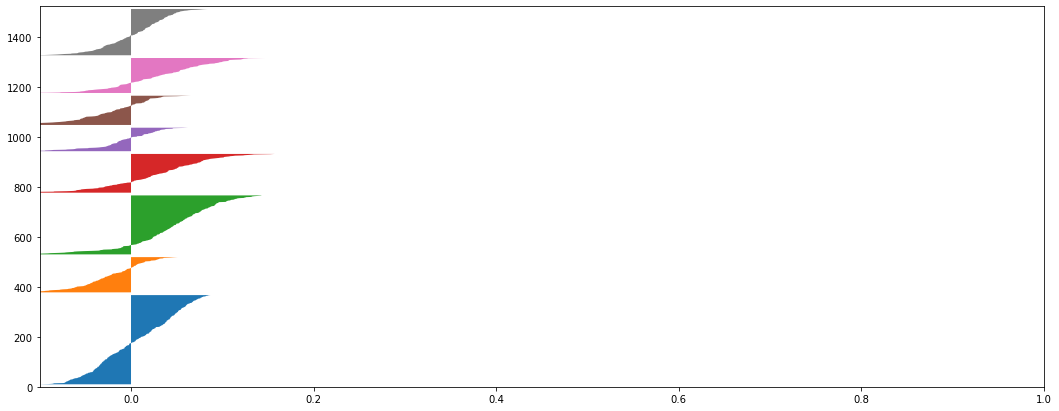

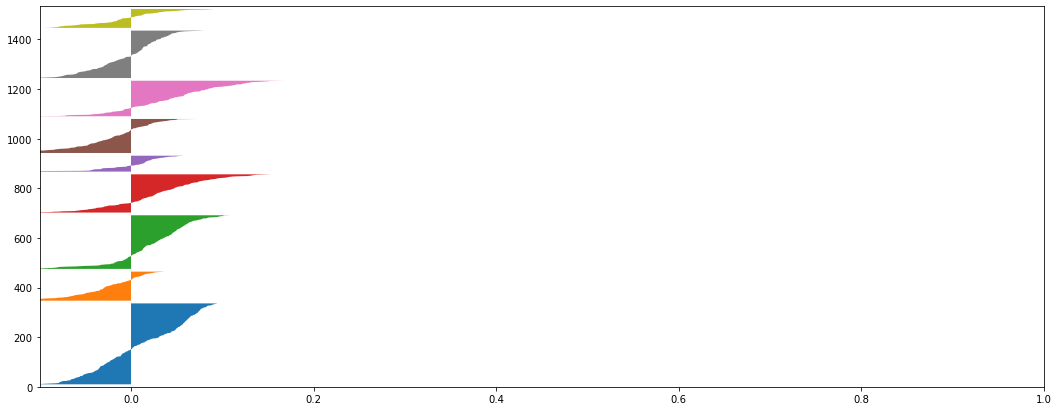

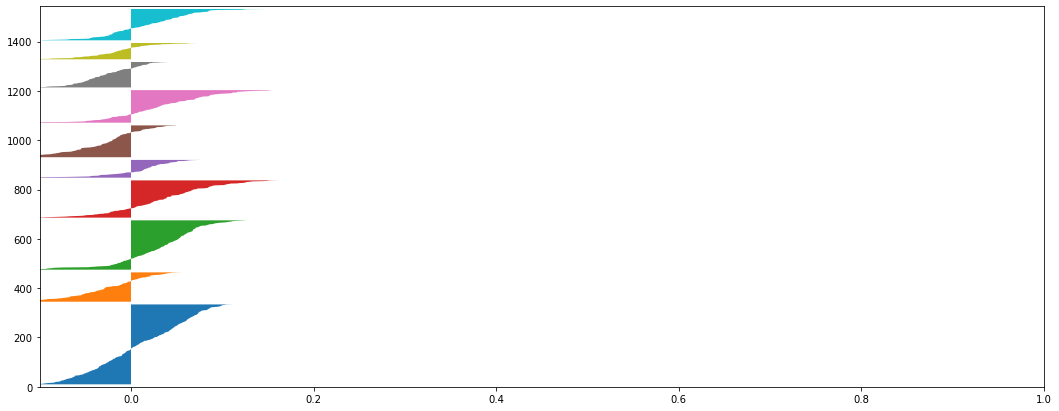

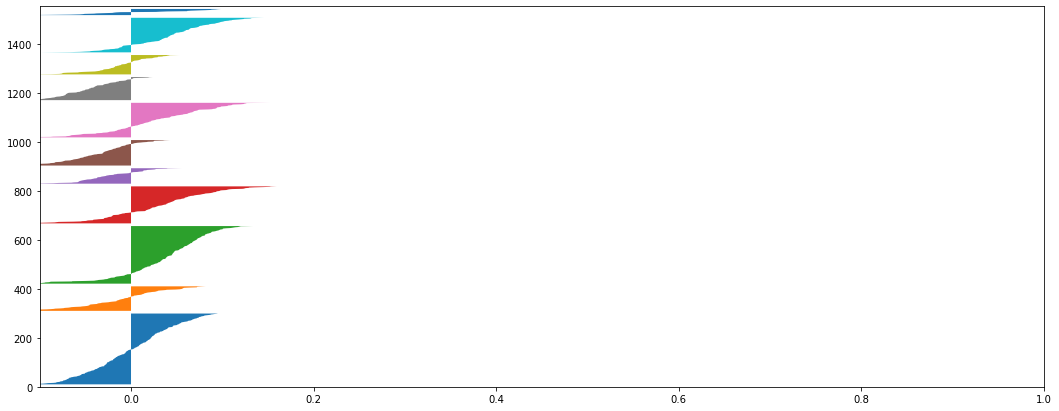

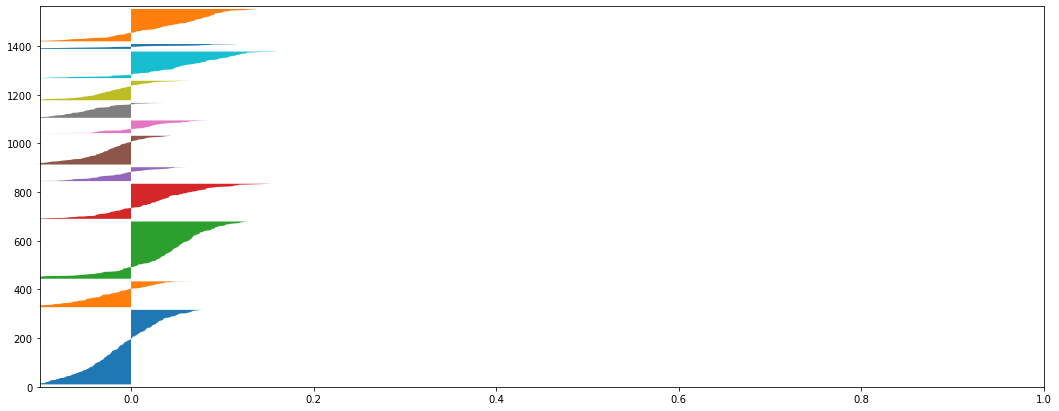

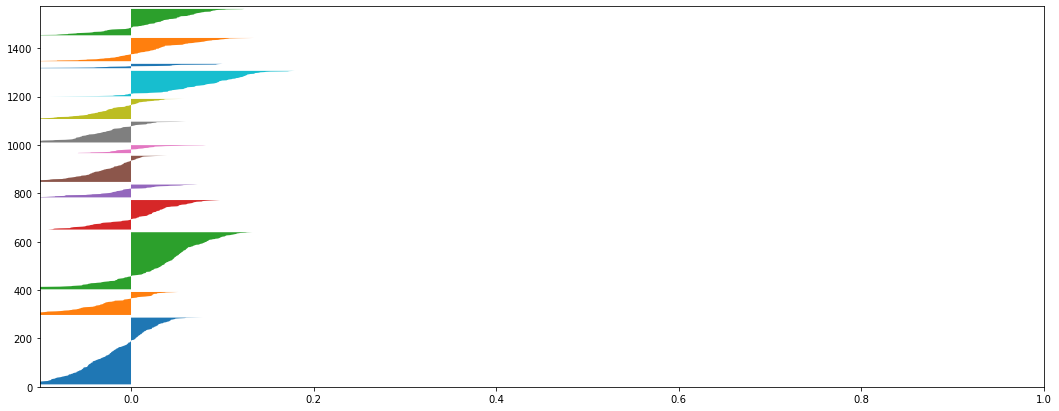

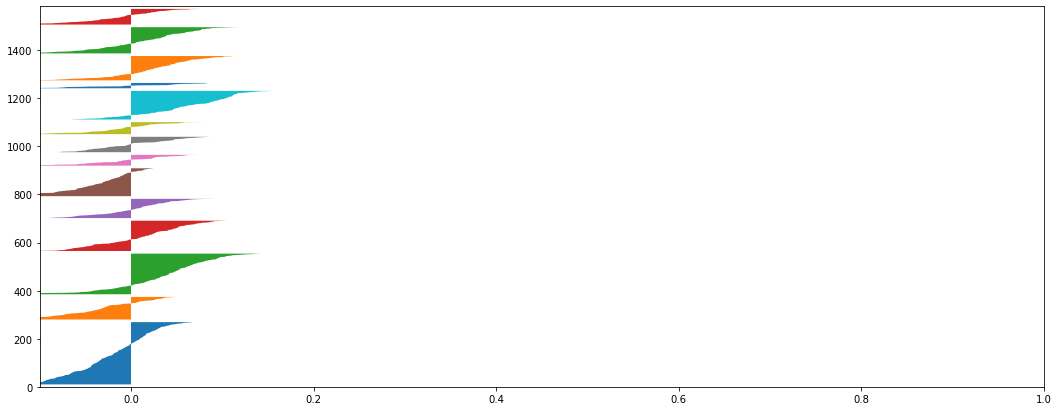

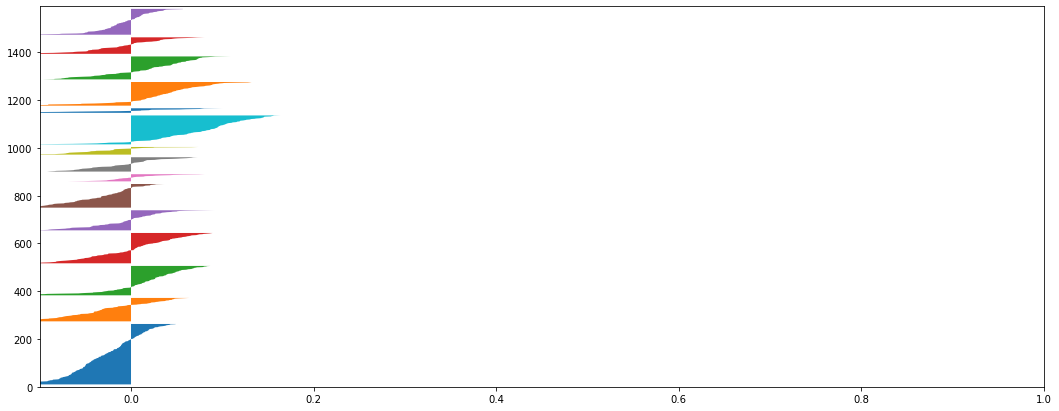

In [9]:
clusters = 15
for cluster in range(2, clusters+1):
    km2 = KModes(n_clusters = cluster,init = 'Cao', random_state = 3)
    y = km2.fit_predict(data1)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1) + (cluster + 1) * 10])
    
    score = silhouette_score(data1, y)
    print('score :',score)

    sil_sample = silhouette_samples(data1, y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10

<h3><font color='orange'>So The Kmeans of cluster number 3 is The WINNER</font></h3>

<h4>obj creation</h4>

In [10]:
kmean = KMeans(n_clusters = 3)

In [11]:
kmean.fit(data1)

KMeans(n_clusters=3)

<h4>Predicting clusters</h4>

In [12]:
Y = kmean.predict(data)

In [13]:
Y.shape

(1433,)

<h4>Joinning to data frame</h4>

In [14]:
data['Y'] = Y

In [15]:
data.shape

(1433, 70)

In [16]:
data['Y'].value_counts()

1    533
2    515
0    385
Name: Y, dtype: int64

<h1><font color='green'>Heading up towards Features</font></h1>

In [17]:
X = data.iloc[:, -2::-1]
Y = data.iloc[:, -1]

<h4><font color='orange'>now we have 70 columns</font></h3>

In [18]:
X.shape, Y.shape 

((1433, 69), (1433,))

<h1><font color='green'> Feature Methods -> Filter Methods -> correlation</font></h1>

<h3><font color='red'>Correlation for 0.7 threshold</font></h3>

<h4>dropping columns bellow 0.7 threshold</h4>

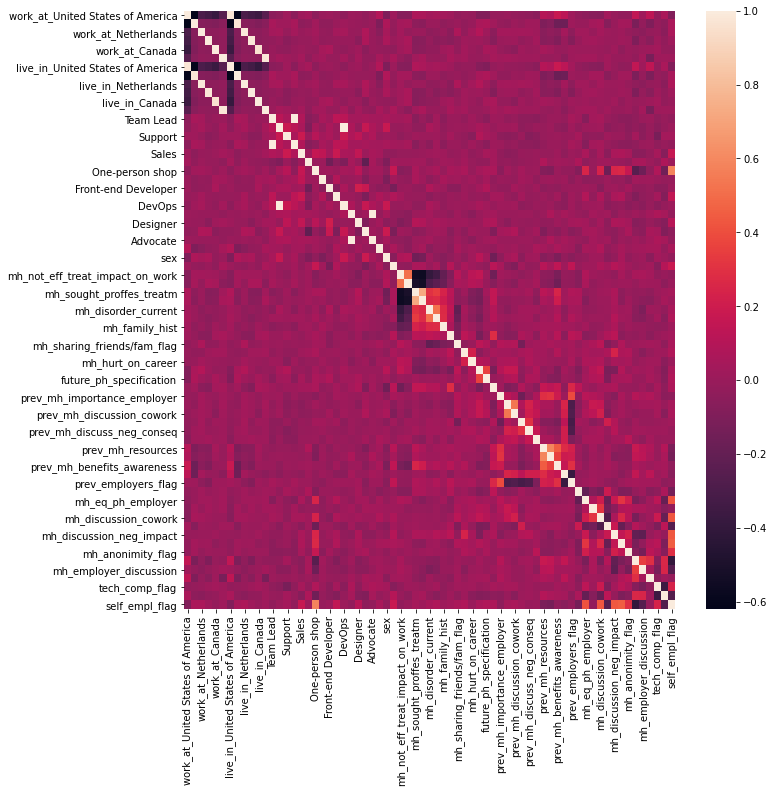

In [19]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = X.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
X.drop(labels=corr_features, axis=1, inplace=True)

<h4>Lets look over heatmap of correlation</h4>

<AxesSubplot:>

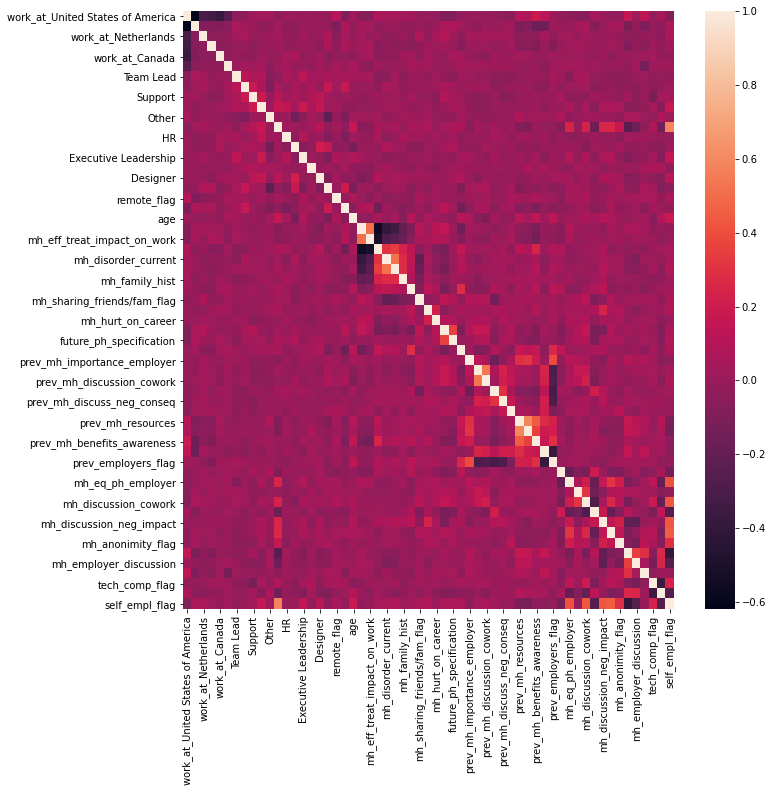

In [20]:
plt.figure(figsize=(11,11))
sns.heatmap(X.corr())

<h4><font color='orange'>now we have 59 columns</font></h3>

In [21]:
X.shape

(1433, 59)

<h1><font color='green'>Feature Slection -> Wrapper Methods -> Backward Elimination</font></h1>

<h3><font color='red'>Sequential Forward Selection for K feature = 50</font></h3>

In [22]:
SFS = SequentialFeatureSelector(RandomForestClassifier(n_jobs = -1), 
           k_features=50, 
           forward=False, 
           floating=False,
           scoring='accuracy',
           cv=2,
           n_jobs = -1)

In [23]:
SFS.fit(X, Y)

SequentialFeatureSelector(cv=2, estimator=RandomForestClassifier(n_jobs=-1),
                          forward=False, k_features=50, n_jobs=-1,
                          scoring='accuracy')

In [24]:
print('->Best accuracy score: %.2f' % SFS.k_score_)
print('->Best subset (indices):', SFS.k_feature_idx_)
print('->Best subset (corresponding names):', SFS.k_feature_names_)

->Best accuracy score: 0.92
->Best subset (indices): (1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58)
->Best subset (corresponding names): ('work_at_United Kingdom', 'work_at_Netherlands', 'work_at_Germany', 'work_at_Canada', 'work_at_Australia', 'Team Lead', 'Support', 'Sales', 'One-person shop', 'HR', 'Executive Leadership', 'Dev Evangelist', 'Designer', 'Back-end Developer', 'remote_flag', 'sex', 'age', 'mh_not_eff_treat_impact_on_work', 'mh_eff_treat_impact_on_work', 'mh_sought_proffes_treatm', 'mh_disorder_current', 'mh_disorder_past', 'mh_family_hist', 'mh_sharing_friends/fam_flag', 'mh_neg_view_cowork', 'mh_hurt_on_career', 'future_mh_specification', 'prev_mh_conseq_coworkers', 'prev_mh_importance_employer', 'prev_mh_discussion_supervisor', 'prev_mh_discussion_cowork', 'prev_ph_discuss_neg_conseq', 'prev_mh_discuss_neg_conseq', 'prev_mh_

<h4>Lets see standard deviation for SFS</h4>

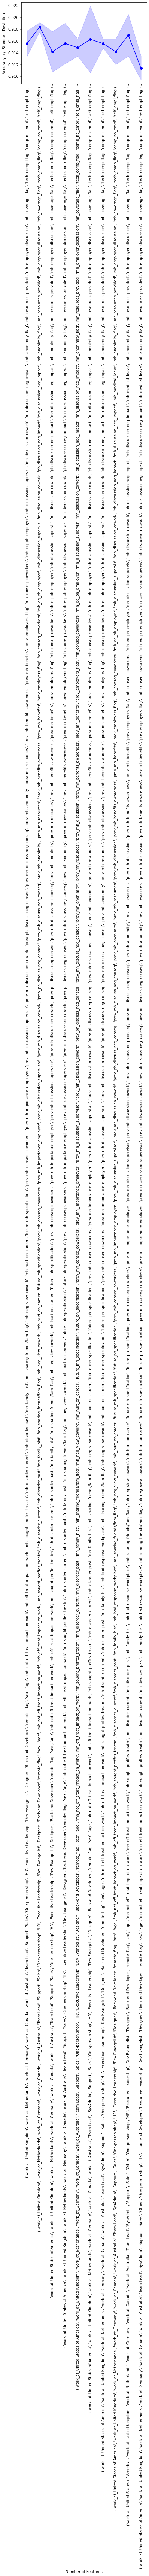

In [25]:
metric_dict = SFS.get_metric_dict()

fig = plt.figure()
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

<h4>Transforming it</h4>

In [26]:
X = SFS.transform(X)

<h4><font color='orange'>now we have 50 columns</font></h3>

In [27]:
X.shape

(1433, 50)

<h4>Lets look Correlation</h4>

<AxesSubplot:>

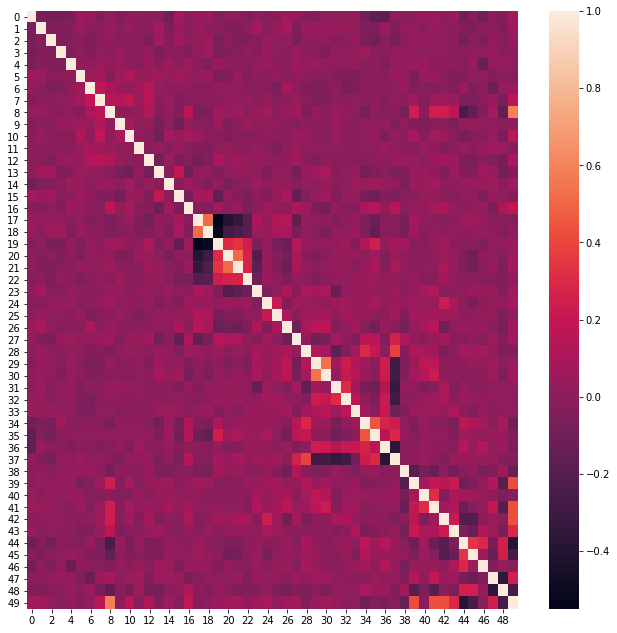

In [28]:
plt.figure(figsize=(11,11))
sns.heatmap(pd.DataFrame(X).corr())

<h1><font color='green'>Feature Extraction -> Principal components analysis</font></h1> 

<h3><font color='red'>PCA</font></h3>

<h4>Lets find what should be the n_components/Feature</h4>

In [29]:
temp_pca = PCA()
temp_pca.fit(X)
var = np.cumsum(temp_pca.explained_variance_ratio_)

<h4>Now we got 27 is good option as 95% of variance is seccured</h4>  

Text(0, 0.5, 'cumulative explained variance')

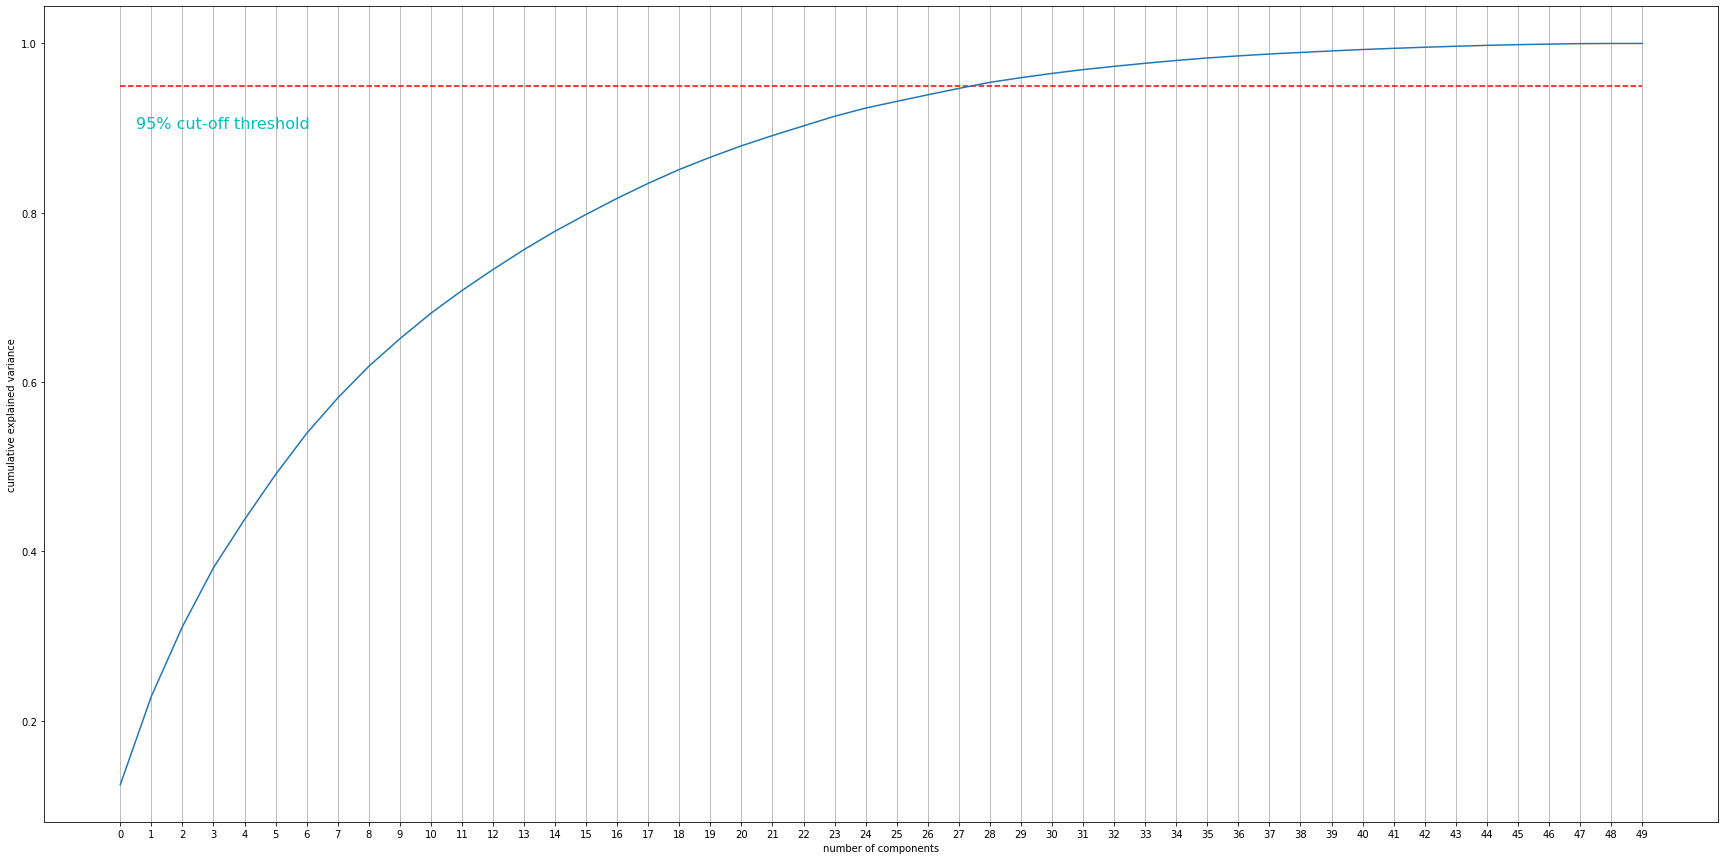

In [30]:
plt.figure(figsize=(30,15))
plt.plot([0.95]*len(var), '--', color = 'r')
plt.plot(var)
plt.grid(axis='x')
plt.xticks(range(len(var)))
plt.text(0.5, 0.90, '95% cut-off threshold', color = 'c', fontsize=16)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<h4>Now creating obj for n_components = 27</h4>

In [31]:
pca = PCA(n_components = 27, random_state = 87)

In [32]:
pca.fit(X)

PCA(n_components=27, random_state=87)

<h4>Now Transformingg </h4>

In [33]:
X = pca.transform(X)

<h4><font color='orange'>Finally we left with 27 Features (70 -> 27)</font></h3>

In [34]:
X.shape

(1433, 27)

In [35]:
data = pd.DataFrame(X)

<h4>Joinig it</h4>

In [36]:
data['Y'] = Y

<h4>Our New Data Frame</h4> 

In [37]:
data

0         1         2         3         4         5         6  \
0    -2.904721 -0.986826  1.008763 -2.250977  0.337504 -1.174353 -1.583538   
1     1.514101  0.558233  3.535721 -0.256478 -1.940273 -0.752207  1.497553   
2    -1.721254 -0.616546  0.010174  2.300193  2.060473 -2.072921 -0.076237   
3    -0.425792 -1.787738 -1.652600  1.207257  1.757503 -1.041515 -1.665376   
4    -0.268376  0.321338 -0.498460  1.881864  1.481922  0.135296 -0.972156   
...        ...       ...       ...       ...       ...       ...       ...   
1428 -2.275589 -1.727758  2.362288  0.418540 -0.247610 -1.095930 -1.977368   
1429  0.238773 -1.182514 -3.137048 -0.665531 -0.357527  0.091698 -1.632975   
1430  2.428534 -1.749966 -0.320443  1.857184  0.744089  1.185058 -0.460214   
1431  0.285932  3.585596  1.062189 -1.704796  0.077390  0.870825 -0.889681   
1432 -0.419881 -1.487837 -2.533434 -0.733712  0.260842  0.901265 -0.662583   

             7         8         9  ...        18        19        20  \
0     0.005916  1.164130 -0.173977  ... -0.030787 -0.841159 -0.134321   
1    -1.199168  0.515099  1.177287  ...  1.034092  0.075327  0.526842   
2    -0.377321  0.499247  0.984014  ...  0.360883 -0.202793 -0.504976   
3     0.224320  0.088709  0.679479  ...  0.188854  0.278244  0.304328   
4    -1.135970  0.986586 -0.518601  ...  1.912595  0.646424  0.550124   
...        ...       ...       ...  ...       ...       ...       ...   
1428  0.082624 -0.882866  0.496336  ... -0.193422 -0.288625 -0.107196   
1429  0.936039 -1.377430 -0.666165  ... -0.790902  0.140155  0.020300   
1430  1.683757  0.313802  1.814602  ... -0.031200 -0.022459 -1.268057   
1431  0.796216 -0.794570 -1.818898  ... -0.029640  2.159650 -0.697766   
1432  0.953582 -1.332781 -2.180031  ...  0.920988  1.191324 -0.114409   

            21        22        23        24        25        26  Y  
0    -0.456224 -0.128445 -0.406188 -0.331258 -0.733365 -0.512377  2  
1     0.266248  0.241167  0.934010 -0.849165 -0.712977  0.306741  1  
2    -0.086872  0.902651 -0.726374 -0.447938 -0.498945 -0.088196  2  
3    -0.783572  0.580809  0.445491  0.004970  0.131513 -0.200454  2  
4    -0.078587 -0.904825  1.271019  0.012225  0.483251  1.019728  1  
...        ...       ...       ...       ...       ...       ... ..  
1428  0.411073 -0.670160  0.371769  0.248822  0.481312 -0.675537  2  
1429  0.684956  0.273476  1.049480  0.475282  0.036068  0.046569  1  
1430 -0.016763  0.151378 -0.331469 -1.090349 -0.359223  0.459964  1  
1431  0.438812 -0.212297  0.609928  0.078395  0.707957 -0.595138  0  
1432  1.424206 -0.123852 -0.626462  0.301475 -0.236518  0.096408  1  

[1433 rows x 28 columns]

<h1><font color='green'>train test split</font></h1> 

In [38]:
X = data.iloc[:,0:27]
Y = data.iloc[:,27]

<h3><font color='red'>slpitting for 20% of test and 80% of Training data</font></h3>

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 18, test_size = 0.2)

<h4>Lets check for shape</h4>

In [40]:
X_train.shape, Y_train.shape

((1146, 27), (1146,))

In [41]:
X_test.shape, Y_test.shape

((287, 27), (287,))

<h1><font color='green'>Supervised on Data -> Classification -> Random Forest</font></h1>

<h3><font color='red'>Tunning of Hyper Parameter for RF</font></h3>

In [42]:
criterions = ["gini", "entropy"]
scores = {"gini" : [], "entropy" : []}
for criterion in criterions:
    score_train = []
    score_test = []
    for depth in range(1,15):
        RF_temp = RandomForestClassifier(criterion = criterion, random_state = 13, max_depth = depth, n_jobs = -1)
        RF_temp.fit(X_train, Y_train)
        score_train.append(RF_temp.score(X_train, Y_train))
        score_test.append(RF_temp.score(X_test,Y_test))
    scores[criterion].append([score_train,score_test])

<h4><font color='orange'>Graph for Entropy where we are checking accuray of train, test and Overfitting </font></h3>

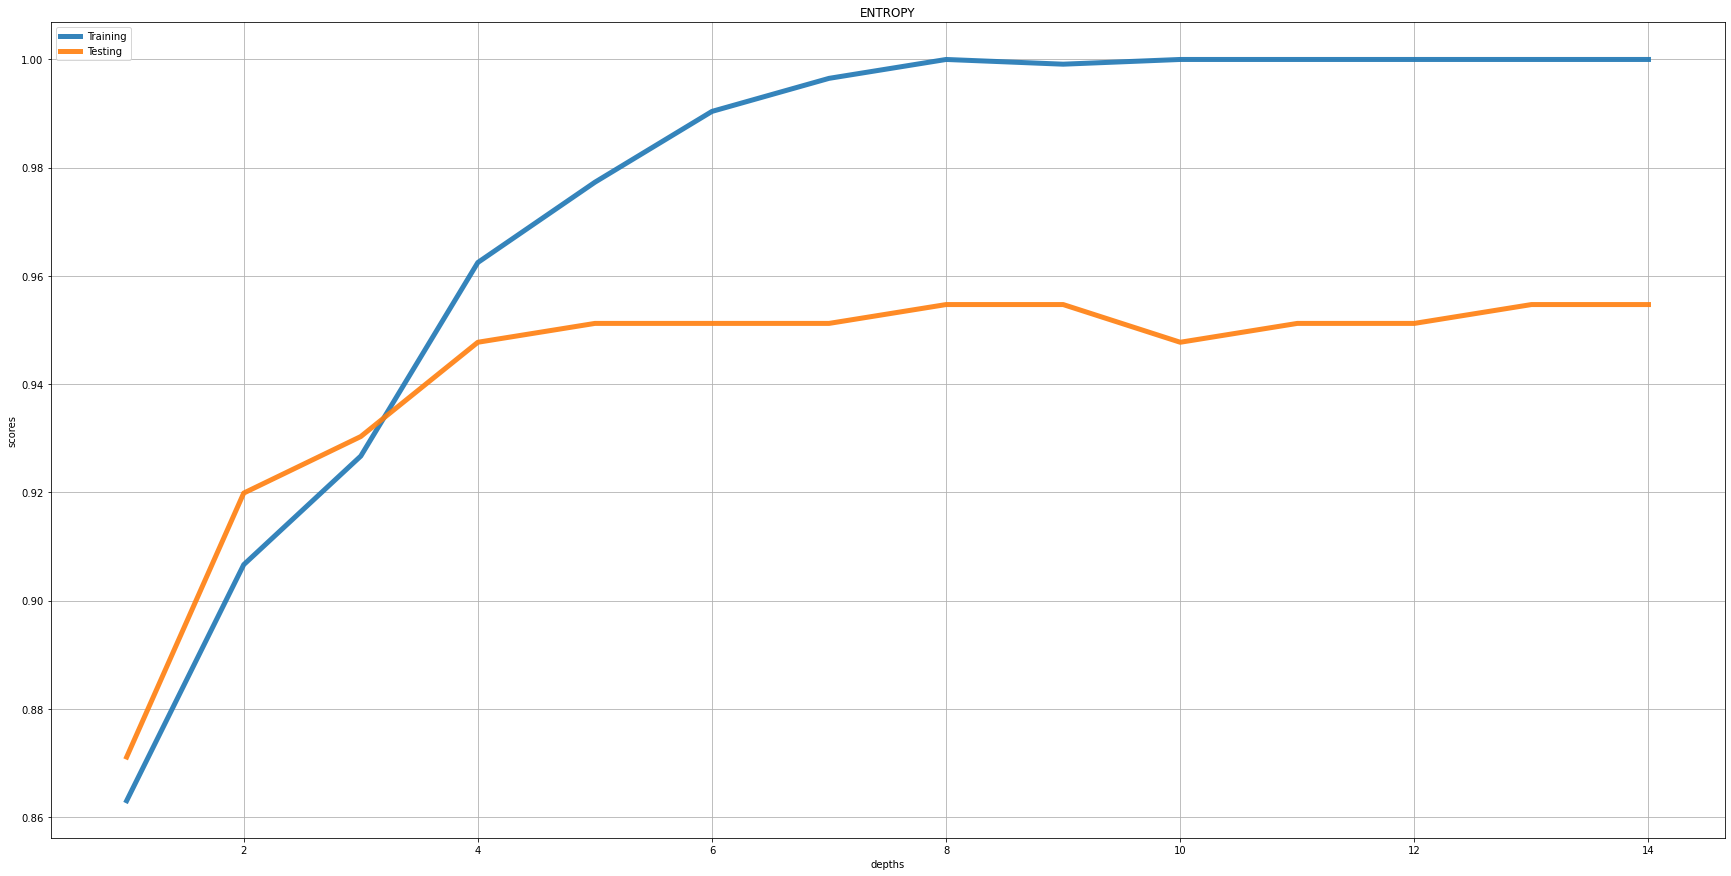

In [43]:
plt.figure(figsize=(30,15))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("ENTROPY")
plt.plot(range(1,15), scores['entropy'][0][0],alpha = 0.9,label = "Training", linewidth = 5)
plt.plot(range(1,15), scores['entropy'][0][1],alpha = 0.9,label = "Testing", linewidth = 5)
plt.grid()
plt.legend()
plt.show()

<h4><font color='orange'>Graph for Gini where we are checking accuray of train, test and Overfitting </font></h3>

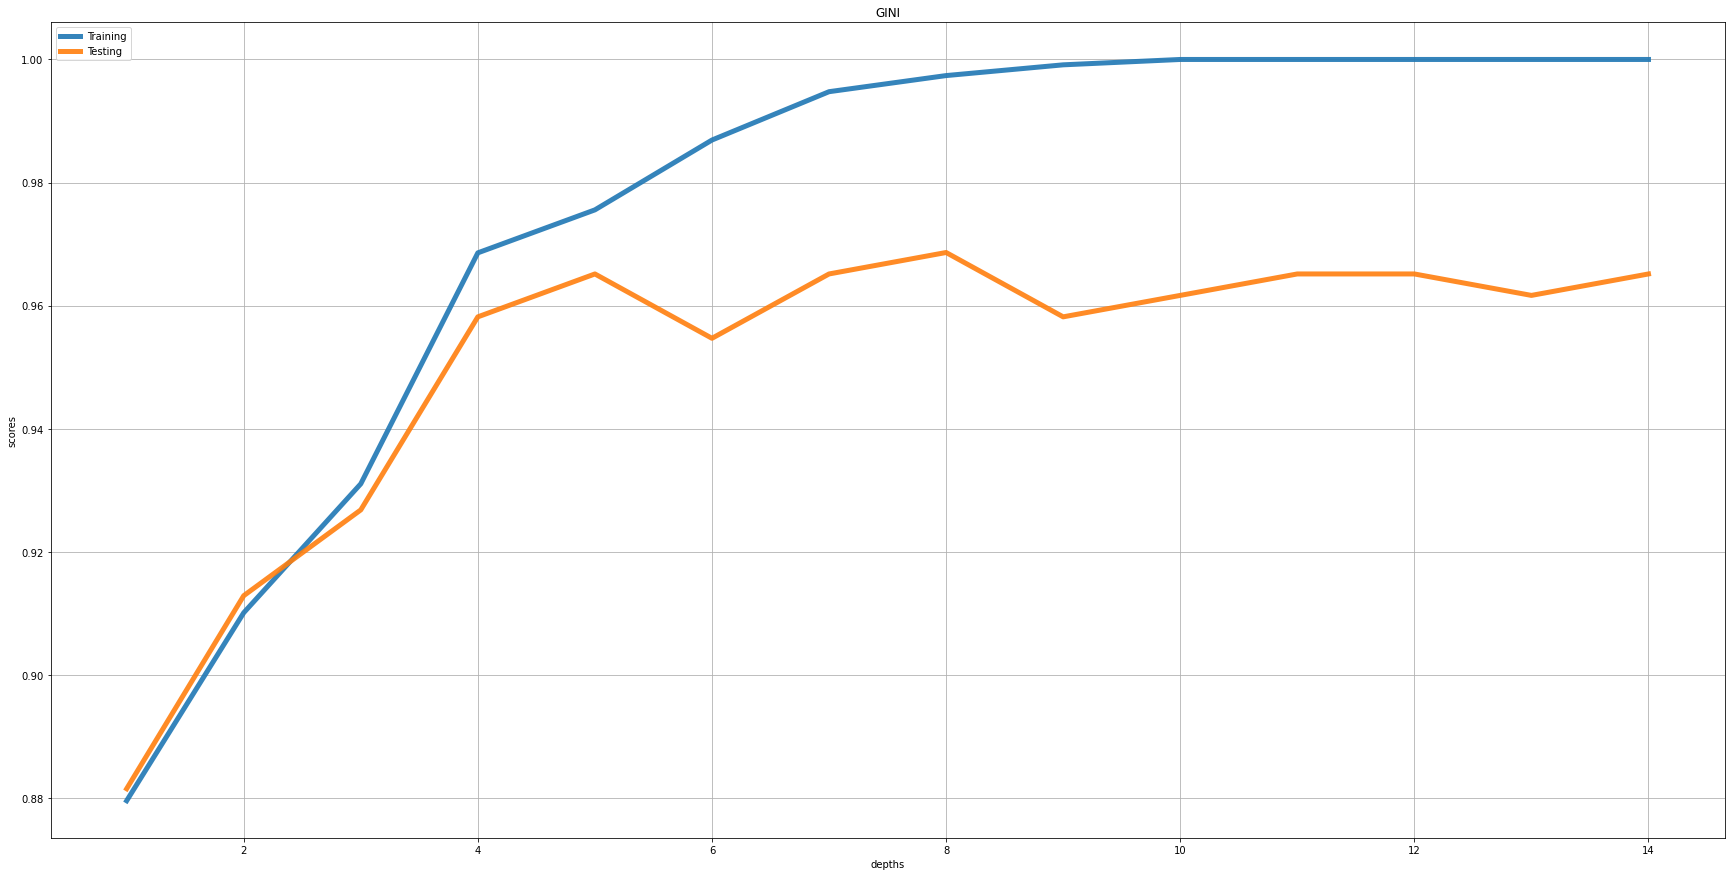

In [44]:
plt.figure(figsize=(30,15))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("GINI")
plt.plot(range(1,15), scores['gini'][0][0],alpha = 0.9,label = "Training", linewidth = 5)
plt.plot(range(1,15), scores['gini'][0][1],alpha = 0.9,label = "Testing", linewidth = 5)
plt.grid()
plt.legend()
plt.show()

<h4>Analysing above Graphs</h4>

<h3><font color='red'>Now The RF for criterion = 'entropy', max_depth = 10 is Winner</font></h3>

<h4>Creating Obj</h4>

In [45]:
RF = RandomForestClassifier(criterion = 'entropy', random_state = 19, max_depth = 10, n_jobs = -1)

In [46]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1,
                       random_state=19)

In [47]:
Y_pred1 = RF.predict(X_test)

<h4>checking for train and test score</h4>

In [48]:
print("Training Score :",RF.score(X_train, Y_train))
print("Testing Score :",RF.score(X_test, Y_test))

Training Score : 1.0
Testing Score : 0.9721254355400697


<h4>Lets look on f1-score, precision, recall </h4> 

In [49]:
print("Classification report :\n",classification_report(Y_test,Y_pred1))

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.96      0.96      0.96       108
           2       0.99      0.98      0.99       110

    accuracy                           0.97       287
   macro avg       0.97      0.97      0.97       287
weighted avg       0.97      0.97      0.97       287



<h4><font color='orange'>Lets plot the Giant tree </font></h3>

[Text(4456.671195652174, 4151.127272727273, '0 <= -0.289\nentropy = 1.57\nsamples = 724\nvalue = [308, 439, 399]'),
 Text(2228.9673913043475, 3755.7818181818184, '18 <= 0.359\nentropy = 0.802\nsamples = 313\nvalue = [85, 10, 397]'),
 Text(1192.8260869565217, 3360.4363636363637, '23 <= 0.07\nentropy = 0.551\nsamples = 200\nvalue = [31, 4, 288]'),
 Text(606.5217391304348, 2965.090909090909, '26 <= -0.161\nentropy = 0.43\nsamples = 97\nvalue = [7, 4, 147]'),
 Text(323.4782608695652, 2569.745454545455, '0 <= -0.522\nentropy = 0.774\nsamples = 39\nvalue = [6, 3, 48]'),
 Text(242.60869565217388, 2174.4, '0 <= -1.93\nentropy = 0.503\nsamples = 37\nvalue = [6, 0, 48]'),
 Text(161.7391304347826, 1779.0545454545454, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 35]'),
 Text(323.4782608695652, 1779.0545454545454, '2 <= -0.986\nentropy = 0.9\nsamples = 14\nvalue = [6, 0, 13]'),
 Text(161.7391304347826, 1383.7090909090907, '4 <= 1.357\nentropy = 0.722\nsamples = 4\nvalue = [4, 0, 1]'),
 Text(80.8695

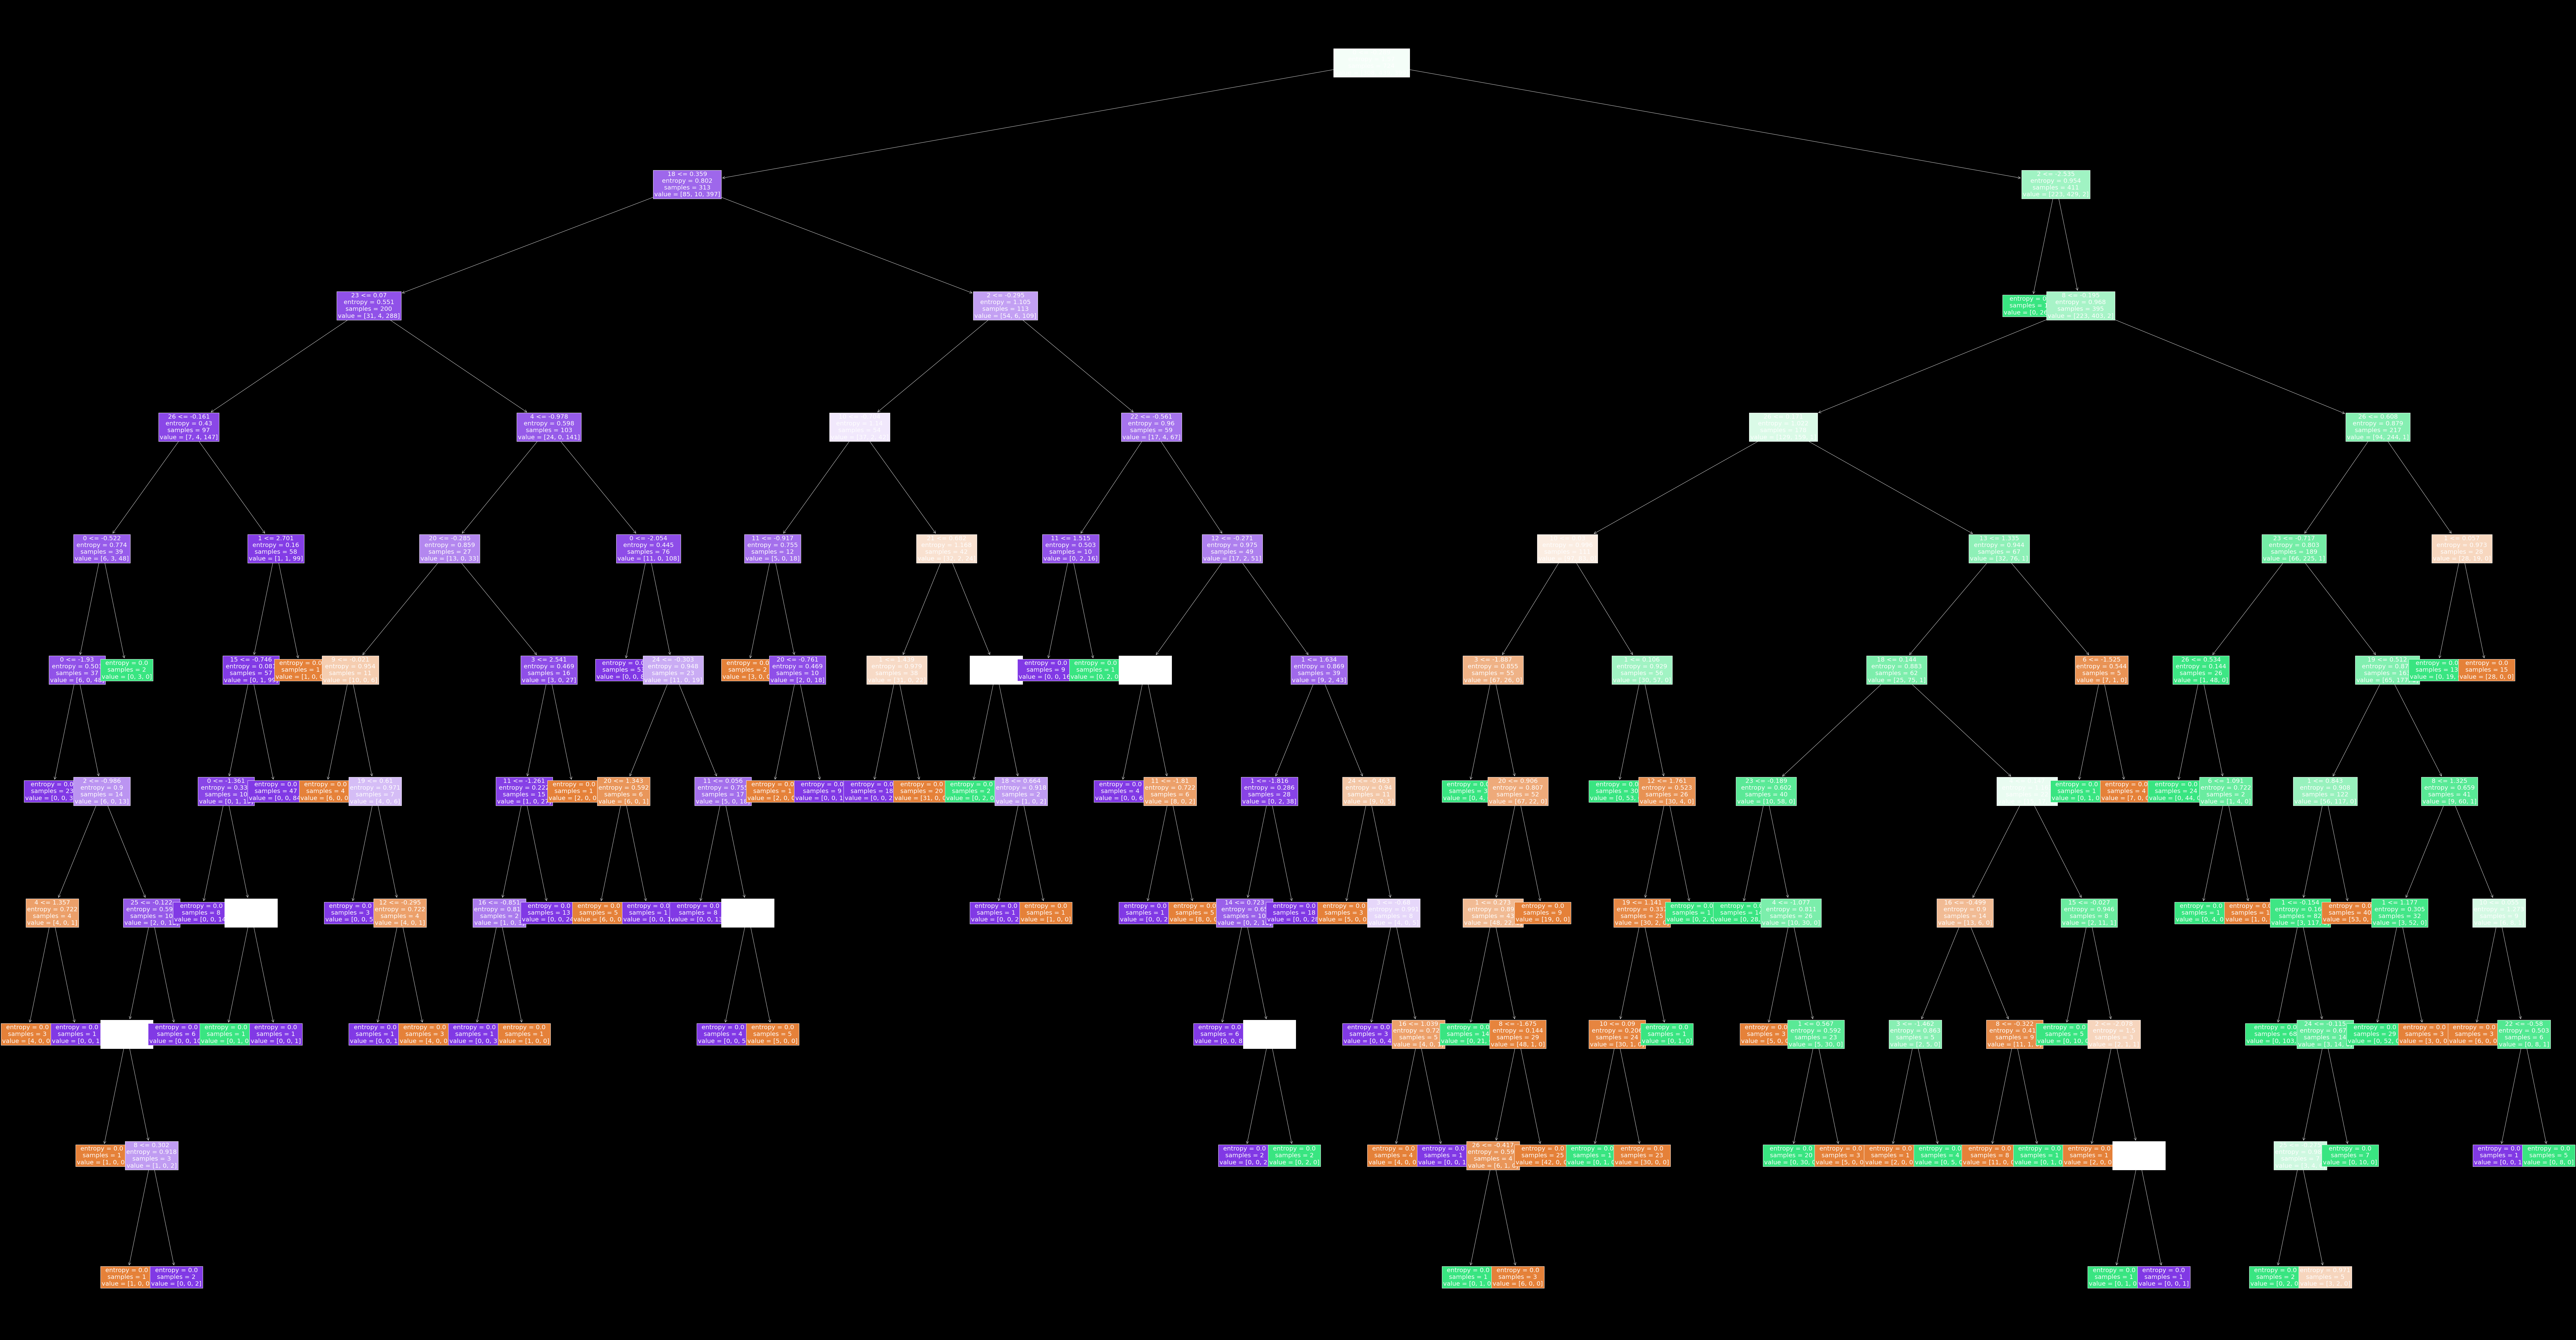

In [50]:
plt.style.use('dark_background')
plt.subplots(figsize=(150,80))
plot_tree(RF.estimators_[0], feature_names=X_train.columns, filled=True, fontsize = 20)

In [51]:
X_train.shape

(1146, 27)

<h1><font color='green'>Supervised on Data -> Classification -> KNN</font></h1>

In [52]:
# s=[]
# for i in range(1,int(X_train.shape[0]**0.5)+50,2):
#     knn_temp = KNeighborsClassifier(n_neighbors=i, n_jobs = -1)
#     knn_temp.fit(X_train,Y_train)
#     Y_pred = knn_temp(X_test)
# #     temp = knn_temp.score(Y_test,Y_pred)
# #     s.append(temp)
# s

<h1><font color='green'>Supervised on Data -> Classification -> SVM</font></h1>

In [53]:
scores = {"linear" : [], "rbf" : [], "poly" : []}
kernels = ["linear", "rbf", "poly"]
gammas = [0.1, 1, 10, 100]
for kernel in kernels:
    score_train = []
    score_test = []
    for gamma in gammas:
        SVM_temp = SVC(kernel = kernel, gamma = gamma, random_state = 11)
        SVM_temp.fit(X_train, Y_train)
        score_train.append(SVM_temp.score(X_train, Y_train))
        score_test.append(SVM_temp.score(X_test,Y_test))
    scores[kernel].append([score_train,score_test])

In [62]:
plt.style.use('seaborn-darkgrid')

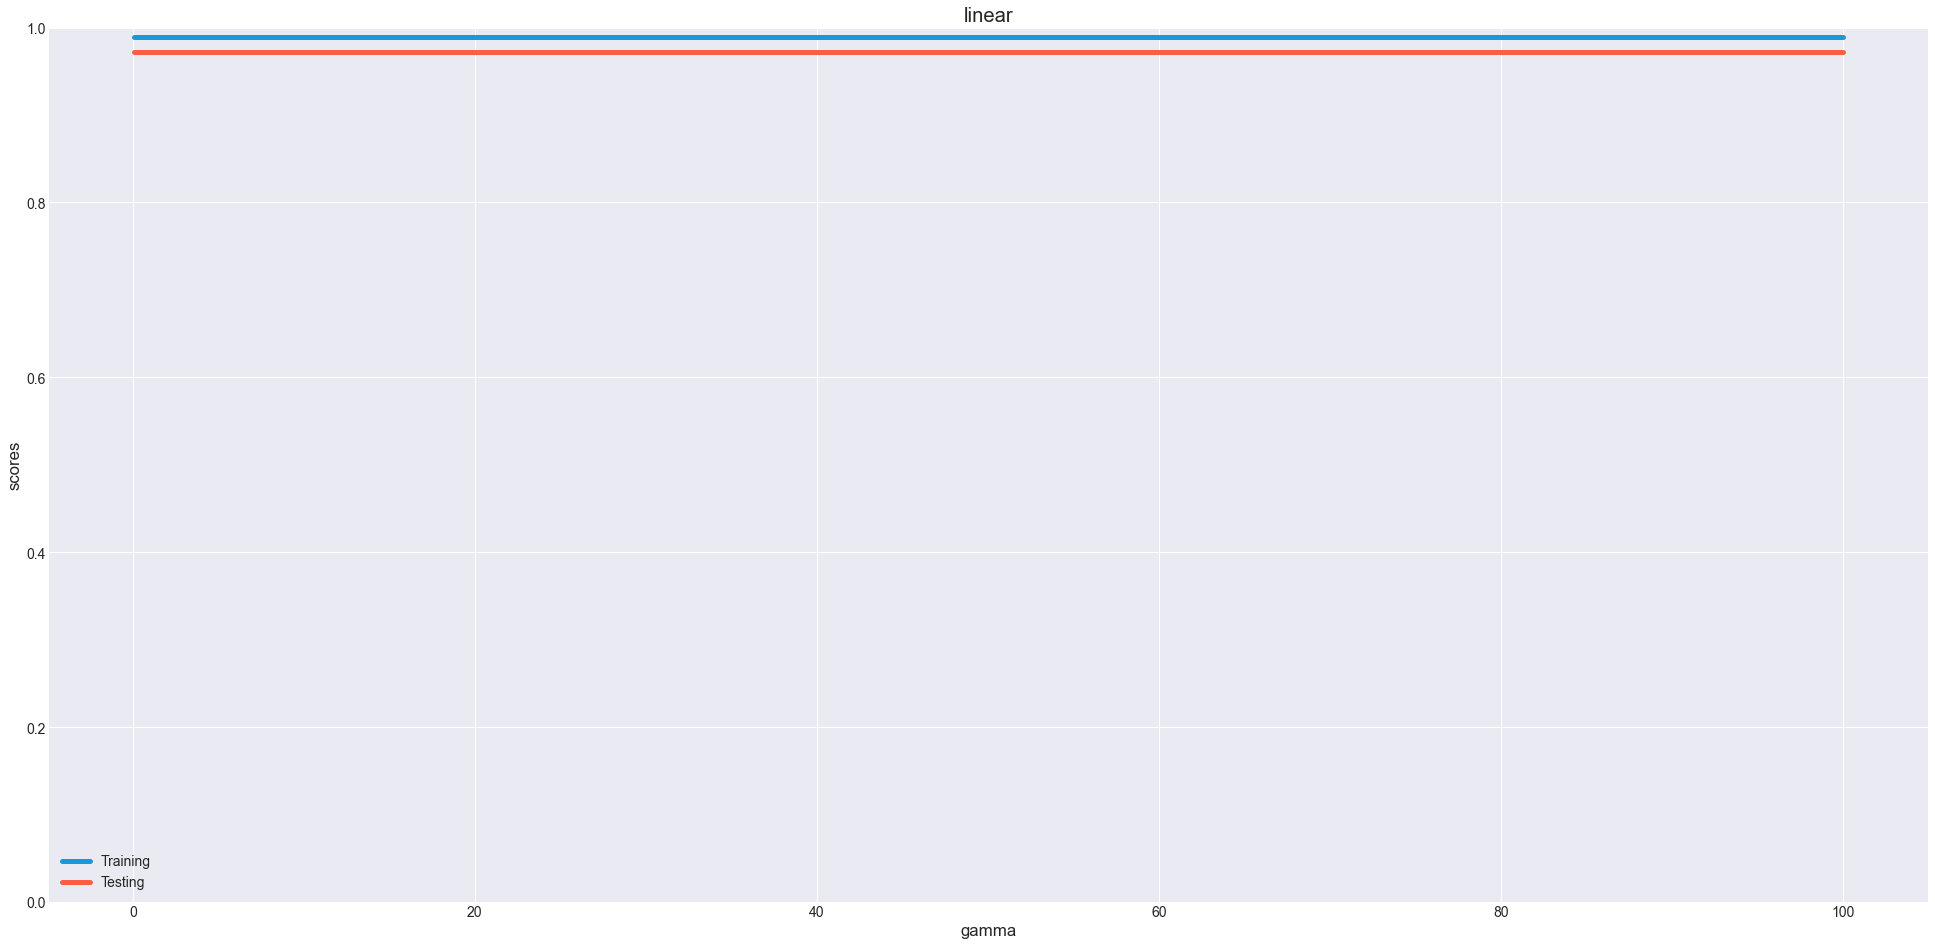

In [69]:
# gammas = [0.1, 1, 10, 100]
plt.figure(figsize=(30,15))
plt.xlabel("gamma")
plt.ylabel("scores")
plt.title("linear")
plt.ylim([0,1])
plt.plot(gammas, scores['linear'][0][0],alpha = 0.9, label = "Training", linewidth = 5)
plt.plot(gammas, scores['linear'][0][1],alpha = 0.9, label = "Testing", linewidth = 5)
plt.legend()
plt.show()

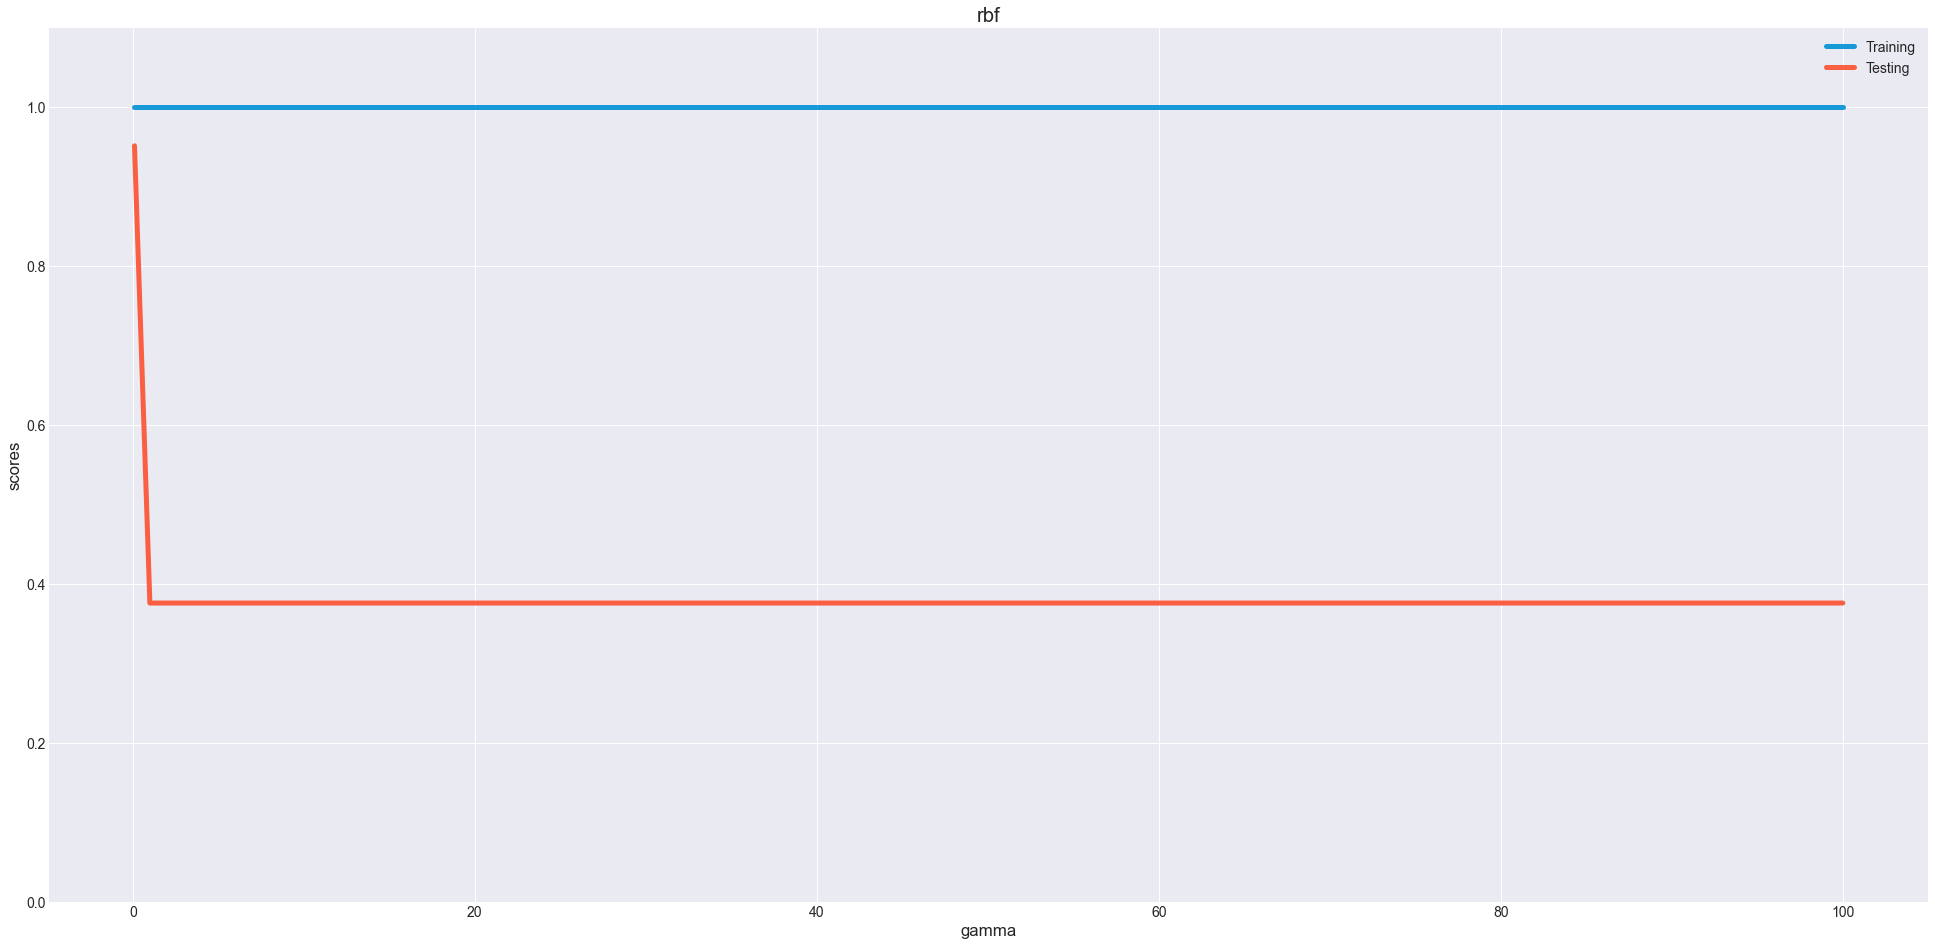

In [76]:
plt.figure(figsize=(30,15))
plt.xlabel("gamma")
plt.ylabel("scores")
plt.title("rbf")
plt.ylim([0,1.1])
plt.plot(gammas, scores['rbf'][0][0],alpha = 0.9, label = "Training", linewidth = 5)
plt.plot(gammas, scores['rbf'][0][1],alpha = 0.9, label = "Testing", linewidth = 5)
plt.legend()
plt.show()

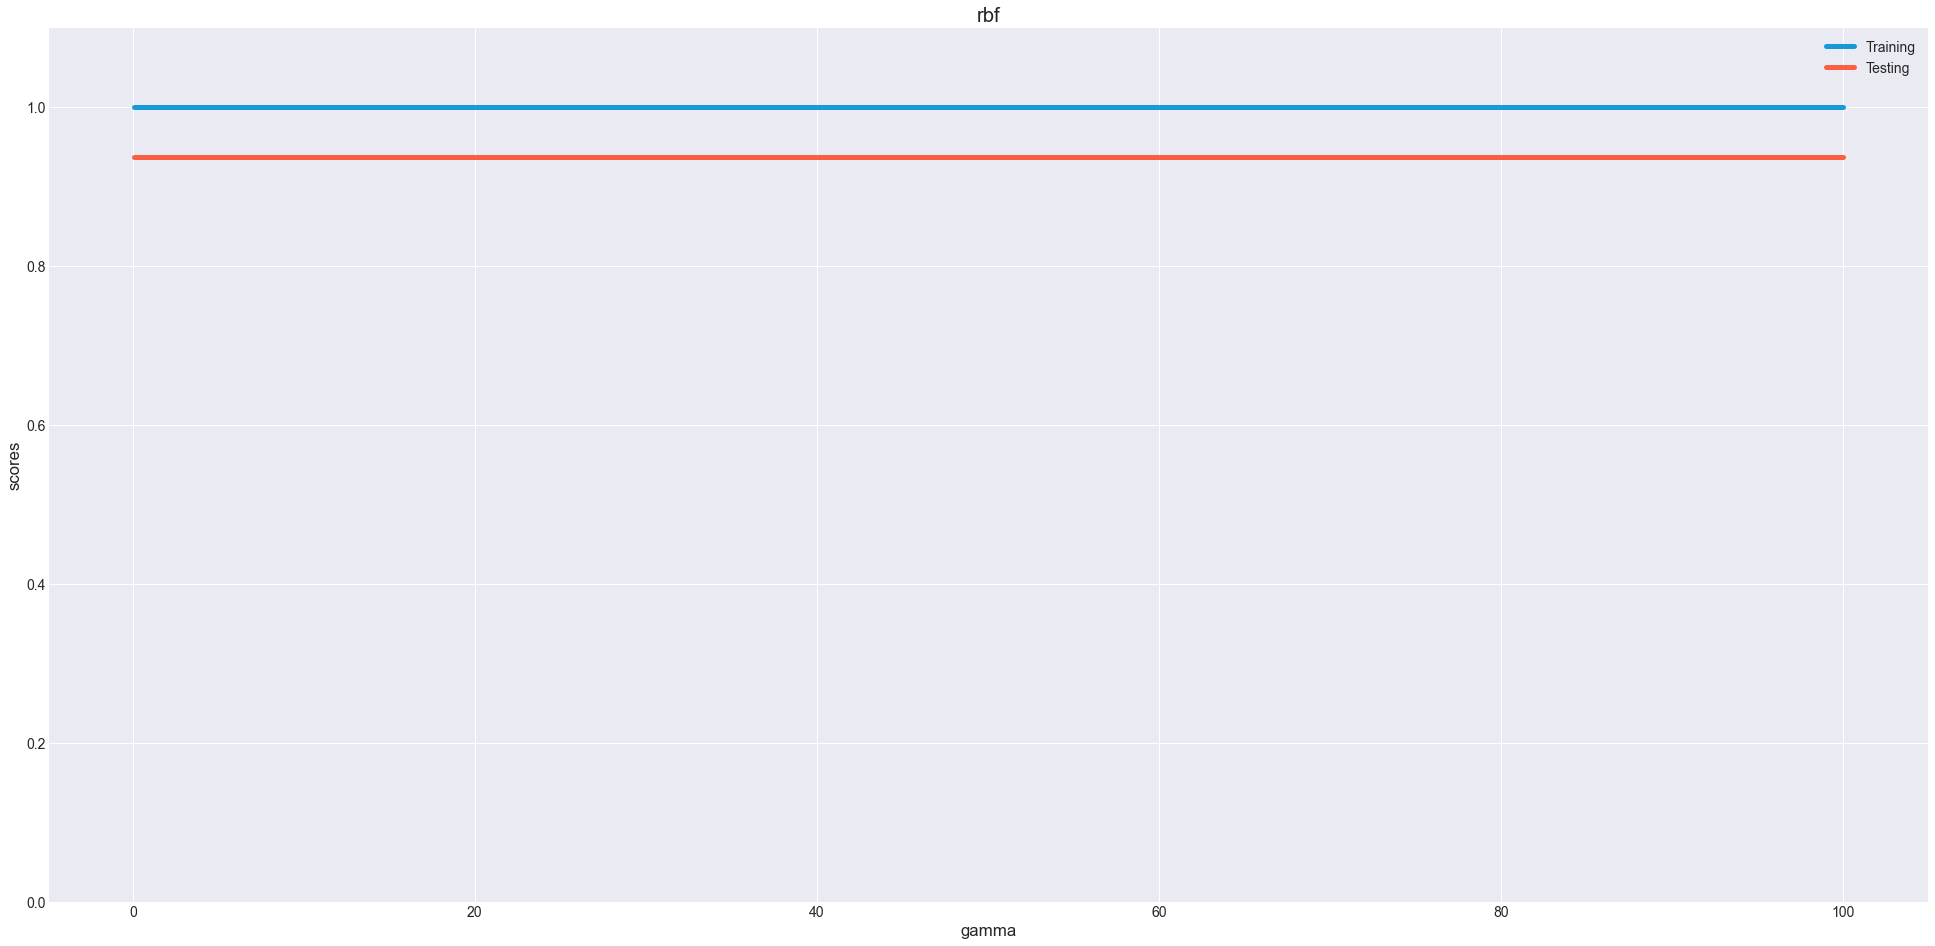

In [77]:
plt.figure(figsize=(30,15))
plt.xlabel("gamma")
plt.ylabel("scores")
plt.title("rbf")
plt.ylim([0,1.1])
plt.plot(gammas, scores['poly'][0][0],alpha = 0.9, label = "Training", linewidth = 5)
plt.plot(gammas, scores['poly'][0][1],alpha = 0.9, label = "Testing", linewidth = 5)
plt.legend()
plt.show()

In [78]:
SVM = SVC(kernel = 'linear', C = 1)

In [79]:
SVM.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

In [80]:
y_pred3 = SVM.predict(X_test)

In [81]:
print("Training Score :",SVM.score(X_train, Y_train))
print("Testing Score :",SVM.score(X_test, Y_test))

Training Score : 0.9895287958115183
Testing Score : 0.9721254355400697
